<a href="https://colab.research.google.com/github/kadefue/MoEST/blob/main/MoEST_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary:

### Q&A
The task aimed to refine the dataset by removing teacher-related data and integrating LGA status information.
- Teacher-related datasets were successfully dropped. The `Data-Teacher Colleges Enrollment 2016-2025` DataFrame was removed from the collection.
- LGA status information was successfully integrated into the remaining datasets where 'Region' and 'Council' columns were present.

### Data Analysis Key Findings
*   **Teacher Data Removal**: The `Data-Teacher Colleges Enrollment 2016-2025` DataFrame was identified and successfully removed from the `loaded_dataframes` dictionary.
*   **LGA Status Data Preparation**: The 'LGAs Urban and Rural Status' DataFrame was extracted, its columns were renamed to 'Region', 'Council', and 'LGA_Status', and 'Region' and 'Council' columns were converted to uppercase for consistent merging. The resulting `df_lga_status` contains 184 entries and 3 columns.
*   **LGA Status Merging**: The `LGA_Status` column was successfully merged into 17 DataFrames (excluding the 'LGAs Urban and Rural Status' itself) within the `loaded_dataframes` dictionary. This involved identifying varying 'Region' and 'Council' column names across DataFrames and standardizing their values to uppercase before merging.
*   **Verification of Merged Data**:
    *   For `COBET 2017-2025`, 1643 out of 1656 entries in the `LGA_Status` column were successfully populated after the merge.
    *   For `Data-Primary Enrollment 2016-2025`, all 1836 entries in the `LGA_Status` column were successfully populated.
    *   For `School Age Population (3-19 years) from 2025-2030`, while the `LGA_Status` column was added, none of its 1104 entries were populated, resulting in 0 non-null values.

### Insights or Next Steps
*   Investigate the `School Age Population (3-19 years) from 2025-2030` DataFrame to understand why no `LGA_Status` values were populated. This could be due to unmatched 'Region' and 'Council' combinations or differing data granularity.
*   Consider strategies for handling missing `LGA_Status` values (e.g., imputation, grouping by 'Region' if 'Council' is too granular, or identifying the source of data mismatch) in datasets where not all entries received an LGA status.


In [82]:
import numpy as np

# 1. Define a dictionary of expected column names and their variations
expected_cols_info = {
    'Year': ['Year', 'YEAR', 'Academic Year'],
    'Region': ['Region', 'REGION', 'REGON'],
    'Council': ['Council', 'COUNCIL', 'DISTRICT', 'LGA NAME']
}

# Iterate through each DataFrame
for df_name, df in loaded_dataframes.items():
    print(f"\n--- Checking DataFrame: {df_name} ---")
    discrepancies = []

    # Iterate through conceptual columns
    for conceptual_col, possible_names in expected_cols_info.items():
        found_col_name = None
        for name in possible_names:
            if name in df.columns:
                found_col_name = name
                break

        if found_col_name:
            # Check data type
            current_dtype = df[found_col_name].dtype
            null_count = df[found_col_name].isnull().sum()

            # Expected data types
            if conceptual_col == 'Year':
                # Check for numeric type (int, float)
                if not pd.api.types.is_numeric_dtype(current_dtype):
                    discrepancies.append({
                        'column': found_col_name,
                        'issue': 'Inconsistent Data Type',
                        'expected': 'numeric (int/float)',
                        'actual': current_dtype
                    })
            elif conceptual_col in ['Region', 'Council']:
                # Check for object/string type
                if not pd.api.types.is_object_dtype(current_dtype):
                    discrepancies.append({
                        'column': found_col_name,
                        'issue': 'Inconsistent Data Type',
                        'expected': 'object/string',
                        'actual': current_dtype
                    })

            # Check for null values
            if null_count > 0:
                discrepancies.append({
                    'column': found_col_name,
                    'issue': 'Null Values',
                    'count': null_count
                })
        else:
            discrepancies.append({
                'column': conceptual_col,
                'issue': 'Missing Column',
                'possible_names': possible_names
            })

    if discrepancies:
        print("Discrepancies found:")
        for disc in discrepancies:
            print(f"  - {disc}")
    else:
        print("No discrepancies found for core columns.")


--- Checking DataFrame: COBET 2017-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Electricity_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Electricity_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_ICT_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_ICT_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Laboratories_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Laboratories_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Pre-Primary Enrollment 2016-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Primary Enrollment 2016-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Primary repeaters 2017-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: 

In [83]:
import numpy as np

# 1. Define a dictionary of expected column names and their variations
expected_cols_info = {
    'Year': ['Year', 'YEAR', 'Academic Year'],
    'Region': ['Region', 'REGION', 'REGON'],
    'Council': ['Council', 'COUNCIL', 'DISTRICT', 'LGA NAME']
}

# Iterate through each DataFrame
for df_name, df in loaded_dataframes.items():
    print(f"\n--- Checking DataFrame: {df_name} ---")
    discrepancies = []

    # Iterate through conceptual columns
    for conceptual_col, possible_names in expected_cols_info.items():
        found_col_name = None
        for name in possible_names:
            if name in df.columns:
                found_col_name = name
                break

        if found_col_name:
            # Check data type
            current_dtype = df[found_col_name].dtype
            null_count = df[found_col_name].isnull().sum()

            # Expected data types
            if conceptual_col == 'Year':
                # Check for numeric type (int, float)
                if not pd.api.types.is_numeric_dtype(current_dtype):
                    discrepancies.append({
                        'column': found_col_name,
                        'issue': 'Inconsistent Data Type',
                        'expected': 'numeric (int/float)',
                        'actual': current_dtype
                    })
            elif conceptual_col in ['Region', 'Council']:
                # Check for object/string type
                if not pd.api.types.is_object_dtype(current_dtype):
                    discrepancies.append({
                        'column': found_col_name,
                        'issue': 'Inconsistent Data Type',
                        'expected': 'object/string',
                        'actual': current_dtype
                    })

            # Check for null values
            if null_count > 0:
                discrepancies.append({
                    'column': found_col_name,
                    'issue': 'Null Values',
                    'count': null_count
                })
        else:
            discrepancies.append({
                'column': conceptual_col,
                'issue': 'Missing Column',
                'possible_names': possible_names
            })

    if discrepancies:
        print("Discrepancies found:")
        for disc in discrepancies:
            print(f"  - {disc}")
    else:
        print("No discrepancies found for core columns.")


--- Checking DataFrame: COBET 2017-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Electricity_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Electricity_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_ICT_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_ICT_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Laboratories_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Laboratories_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Pre-Primary Enrollment 2016-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Primary Enrollment 2016-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Primary repeaters 2017-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: 

In [84]:
!ls '/content/drive/MyDrive/GUIDELINES_TSC_JAN2026/Data Set/csvs/'

'COBET 2017-2025.csv'
 Combined_Electricity_All_G_NG.csv
 Combined_Electricity_Govt.csv
 Combined_ICT_All_G_NG.csv
 Combined_ICT_Govt.csv
 Combined_Laboratories_All_G_NG.csv
 Combined_Laboratories_Govt.csv
'Data-Pre-Primary Enrollment 2016-2025.csv'
'Data-Primary Enrollment 2016-2025.csv'
'Data-Primary repeaters 2017-2025.csv'
'Data-Primary STD VII Leavers 2017-2025.csv'
'Data-Secondary Enrollment 2016-2025.csv'
'Data-Secondary Tables and chairs 2016-2025.csv'
'Data-Teacher Colleges Enrollment 2016-2025.csv'
'Data-Vocational Enrollment 2024-2025.csv'
'Dropout-Primary 2017-2024.csv'
'Dropout-Secondary  2017-2024.csv'
'LGAs Urban and Rural Status.csv'
'PRE-PRIMARY - DISABALITY 2024-2025.csv'
'Pre-primary GER NA NER 2017-2025.csv'
'PRIMARY DESK 2016-2025.csv'
'PRIMARY - DISABALITY 2017-2025.csv'
'Primary GIR NA NIR 2017-2025.csv'
'Primary_Number of Students and Textbooks per subject 2019.csv'
'Primary_Number of Students and Textbooks per subject 2020.csv'
'Primary_Number of Students and T

# Task
Load all CSV files from the directory '/content/drive/MyDrive/GUIDELINES_TSC_JAN2026/Data Set/csvs/' into separate pandas DataFrames, excluding those with 'Secondary' or 'Textbooks' in their filenames. Then, for each loaded DataFrame, display the first few rows and a summary of its structure to confirm successful loading and data type inference.

## Identify Files to Load

### Subtask:
Filter the list of available CSV files to exclude those containing the words 'Secondary' or 'Textbooks' in their filenames.


**Reasoning**:
First, I'll extract the raw output from the previous `ls` command to get the list of filenames as a string. This is necessary to process the file names programmatically.



In [85]:
import pandas as pd

ls_output = """'COBET 2017-2025.csv'
 Combined_Electricity_All_G_NG.csv
 Combined_Electricity_Govt.csv
 Combined_ICT_All_G_NG.csv
 Combined_ICT_Govt.csv
 Combined_Laboratories_All_G_NG.csv
 Combined_Laboratories_Govt.csv
'Data-Pre-Primary Enrollment 2016-2025.csv'
'Data-Primary Enrollment 2016-2025.csv'
'Data-Primary repeaters 2017-2025.csv'
'Data-Primary STD VII Leavers 2017-2025.csv'
'Data-Secondary Enrollment 2016-2025.csv'
'Data-Secondary Tables and chairs 2016-2025.csv'
'Data-Teacher Colleges Enrollment 2016-2025.csv'
'Data-Vocational Enrollment 2024-2025.csv'
'Dropout-Primary 2017-2024.csv'
'Dropout-Secondary  2017-2024.csv'
'LGAs Urban and Rural Status.csv'
'PRE-PRIMARY - DISABALITY 2024-2025.csv'
'Pre-primary GER NA NER 2017-2025.csv'
'PRIMARY DESK 2016-2025.csv'
'PRIMARY - DISABALITY 2017-2025.csv'
'Primary GIR NA NIR 2017-2025.csv'
'Primary_Number of Students and Textbooks per subject 2019.csv'
'Primary_Number of Students and Textbooks per subject 2020.csv'
'Primary_Number of Students and Textbooks per subject 2021.csv'
'Primary_Number of Students and Textbooks per subject 2022.csv'
'Primary_Number of Students and Textbooks per subject 2023.csv'
'Primary_Number of Students and Textbooks per subject 2024.csv'
'Primary_Number of Students and Textbooks per subject 2025.csv'
'PRIMARY Pit Latrine AND CLASSROOMS  Final 2016-2025.csv'
 Primary-Re_entry.csv
'School Age Population (3-19 years) from 2025-2030.csv'
'Secondary - DISABALITY 2020-2025.csv'
'Secondary_Number of Students and Textbooks per subject 2019.csv'
'Secondary_Number of Students and Textbooks per subject 2020.csv'
'Secondary_Number of Students and Textbooks per subject 2021.csv'
'Secondary_Number of Students and Textbooks per subject 2022.csv'
'Secondary_Number of Students and Textbooks per subject 2023.csv'
'Secondary_Number of Students and Textbooks per subject 2024 NewCurriculum.csv'
'Secondary_Number of Students and Textbooks per subject 2024 Old Curriculum.csv'
'Secondary_Number of Students and Textbooks per subject 2025 OldCurriculum_GeneralStream.csv'
'Secondary_Number of Students and Textbooks per subject 2025 Vocational Stream.csv'
 Secondary-Re_entry.csv"""

# Split the string into a list of filenames, cleaning up extra spaces and quotes
all_files = [f.strip().strip("'\"") for f in ls_output.split('\n') if f.strip()]

# Define keywords to exclude
exclude_keywords = ['Secondary', 'Textbooks']

# Filter the files
filtered_files = []
for file_name in all_files:
    if not any(keyword in file_name for keyword in exclude_keywords):
        filtered_files.append(file_name)

print("Filtered files:")
for f in filtered_files:
    print(f)


Filtered files:
COBET 2017-2025.csv
Combined_Electricity_All_G_NG.csv
Combined_Electricity_Govt.csv
Combined_ICT_All_G_NG.csv
Combined_ICT_Govt.csv
Combined_Laboratories_All_G_NG.csv
Combined_Laboratories_Govt.csv
Data-Pre-Primary Enrollment 2016-2025.csv
Data-Primary Enrollment 2016-2025.csv
Data-Primary repeaters 2017-2025.csv
Data-Primary STD VII Leavers 2017-2025.csv
Data-Teacher Colleges Enrollment 2016-2025.csv
Data-Vocational Enrollment 2024-2025.csv
Dropout-Primary 2017-2024.csv
LGAs Urban and Rural Status.csv
PRE-PRIMARY - DISABALITY 2024-2025.csv
Pre-primary GER NA NER 2017-2025.csv
PRIMARY DESK 2016-2025.csv
PRIMARY - DISABALITY 2017-2025.csv
Primary GIR NA NIR 2017-2025.csv
PRIMARY Pit Latrine AND CLASSROOMS  Final 2016-2025.csv
Primary-Re_entry.csv
School Age Population (3-19 years) from 2025-2030.csv


## Load Datasets

### Subtask:
Load each of the identified CSV files into separate pandas DataFrames.


**Reasoning**:
I will load each of the filtered CSV files into separate pandas DataFrames and store them in a dictionary, using the base directory and the filtered file names. I'll print the keys of the dictionary to confirm the dataframes are loaded.



In [86]:
base_directory = '/content/drive/MyDrive/GUIDELINES_TSC_JAN2026/Data Set/csvs/'
loaded_dataframes = {}

for file_name in filtered_files:
    file_path = f"{base_directory}{file_name}"
    df_name = file_name.replace('.csv', '') # Use file name without extension as dictionary key
    try:
        loaded_dataframes[df_name] = pd.read_csv(file_path)
        print(f"Loaded {df_name} successfully.")
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

print("\nDataFrames loaded into dictionary with keys:")
print(loaded_dataframes.keys())

Loaded COBET 2017-2025 successfully.
Loaded Combined_Electricity_All_G_NG successfully.
Loaded Combined_Electricity_Govt successfully.
Loaded Combined_ICT_All_G_NG successfully.
Loaded Combined_ICT_Govt successfully.
Loaded Combined_Laboratories_All_G_NG successfully.
Loaded Combined_Laboratories_Govt successfully.
Loaded Data-Pre-Primary Enrollment 2016-2025 successfully.
Loaded Data-Primary Enrollment 2016-2025 successfully.
Loaded Data-Primary repeaters 2017-2025 successfully.
Loaded Data-Primary STD VII Leavers 2017-2025 successfully.
Loaded Data-Teacher Colleges Enrollment 2016-2025 successfully.
Loaded Data-Vocational Enrollment 2024-2025 successfully.
Loaded Dropout-Primary 2017-2024 successfully.
Loaded LGAs Urban and Rural Status successfully.
Loaded PRE-PRIMARY - DISABALITY 2024-2025 successfully.
Loaded Pre-primary GER NA NER 2017-2025 successfully.
Loaded PRIMARY DESK 2016-2025 successfully.
Loaded PRIMARY - DISABALITY 2017-2025 successfully.
Loaded Primary GIR NA NIR 2017-

**Reasoning**:
Now that all the CSV files have been loaded into separate DataFrames, I will iterate through the `loaded_dataframes` dictionary and display the first few rows (using `.head()`) and a summary of its structure (using `.info()`) for each DataFrame. This will confirm successful loading and data type inference, as requested by the main task.



In [87]:
for df_name, df in loaded_dataframes.items():
    print(f"\n--- DataFrame: {df_name} ---")
    print("First 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()


--- DataFrame: COBET 2017-2025 ---
First 5 rows:
   Year  Region    Council  COBET learners COHORT I (11 TO 13 YEARS)  \
0  2017  ARUSHA     Arusha                                       474   
1  2017  ARUSHA  Arusha CC                                       412   
2  2017  ARUSHA     Karatu                                       249   
3  2017  ARUSHA    Longido                                       266   
4  2017  ARUSHA       Meru                                       126   

   COBET Learners COHORT II (14 TO 18 YEARS)  
0                                         33  
1                                        128  
2                                        122  
3                                          8  
4                                         52  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                              

## Clean Data Types and Drop Unnecessary Columns

### Subtask:
Convert columns with numerical values stored as 'object' (due to commas or other non-numeric characters) to appropriate numeric types, and drop 'Unnamed: X' columns that are predominantly null.


**Reasoning**:
I will iterate through each DataFrame, identify and convert 'object' columns containing numerical data (after removing commas) to numeric types, and then drop 'Unnamed: X' columns with a high percentage of null values before displaying the updated DataFrame information.



In [88]:
import re

for df_name, df in loaded_dataframes.items():
    print(f"\n--- Cleaning DataFrame: {df_name} ---")

    # 1. Convert 'object' columns to numeric where applicable
    for col in df.select_dtypes(include='object').columns:
        # Check if the column contains commas, which often indicates numerical data stored as string
        if df[col].astype(str).str.contains(',').any() or df[col].astype(str).str.fullmatch(r'\d+\.?\d*').any():
            # Attempt to convert to numeric after removing commas and other non-numeric characters
            # First, clean the string column: remove commas and trim whitespace
            cleaned_col = df[col].astype(str).str.replace(',', '', regex=False).str.strip()

            # Convert to numeric, coercing errors to NaN
            converted_col = pd.to_numeric(cleaned_col, errors='coerce')

            # If a significant portion could be converted, update the column
            # We check if the number of non-null values increased or stayed the same, and if the dtype changed
            if converted_col.notna().sum() > 0 and converted_col.dtype != object:
                df[col] = converted_col
                print(f"  Converted column '{col}' to numeric type.")

    # 2. Drop 'Unnamed: X' columns that are predominantly null
    unnamed_cols = [col for col in df.columns if re.match(r'Unnamed: \d+', str(col))]
    cols_to_drop = []
    for col in unnamed_cols:
        # Calculate null percentage
        null_percentage = df[col].isnull().sum() / len(df) * 100
        # Drop if more than 90% are null
        if null_percentage > 90:
            cols_to_drop.append(col)

    if cols_to_drop:
        df.drop(columns=cols_to_drop, inplace=True)
        print(f"  Dropped columns: {', '.join(cols_to_drop)}")

    print("Updated DataFrame Info:")
    df.info()



--- Cleaning DataFrame: COBET 2017-2025 ---
Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Year                                       1656 non-null   int64 
 1   Region                                     1656 non-null   object
 2   Council                                    1656 non-null   object
 3   COBET learners COHORT I (11 TO 13 YEARS)   1656 non-null   int64 
 4   COBET Learners COHORT II (14 TO 18 YEARS)  1656 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 64.8+ KB

--- Cleaning DataFrame: Combined_Electricity_All_G_NG ---
Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------       

## Final Task

### Subtask:
Confirm that all relevant datasets have been loaded and are ready for further analysis.


## Summary:

### Q&A
Yes, all relevant datasets have been successfully loaded and are now cleaner and better prepared for further analysis after initial data type adjustments and removal of irrelevant columns.

### Data Analysis Key Findings
*   **File Filtering**: Out of an initial list of 47 CSV files, 23 were selected for loading after excluding files containing 'Secondary' or 'Textbooks' in their filenames.
*   **Dataset Loading**: All 23 filtered CSV files were successfully loaded into separate pandas DataFrames, each named after its original filename, confirming the availability of all intended datasets.
*   **Initial Data Quality Issues (Pre-Cleaning)**:
    *   Many numerical columns across several DataFrames, such as 'Data-Primary Enrollment 2016-2025' and 'PRIMARY DESK 2016-2025', were initially inferred as `object` (string) type due to the presence of commas (e.g., "11,305") or other non-numeric characters.
    *   Several DataFrames, including 'Data-Primary STD VII Leavers 2017-2025' and 'PRIMARY DESK 2016-2025', contained "Unnamed: X" columns with a high percentage of null values, indicating extraneous data.
*   **Data Cleaning Success**:
    *   The cleaning process successfully converted `object` columns containing numerical data into appropriate numeric types (e.g., `int64`, `float64`) in affected DataFrames. For example, all 'Grade-X' columns in 'Data-Primary Enrollment 2016-2025' and several columns in 'PRIMARY DESK 2016-2025' (e.g., 'TOTAL ENROLMENT', 'One_Seater_desk') were correctly cast to numeric types.
    *   Extraneous "Unnamed: X" columns with over 90% null values were effectively dropped. For instance, 'Data-Primary STD VII Leavers 2017-2025' had 'Unnamed: 4' through 'Unnamed: 14' removed, improving DataFrame structure.

### Insights or Next Steps
*   **Handle Remaining `NaN` Values**: Further investigation into the `NaN` values introduced during numeric conversion is needed to determine appropriate imputation or removal strategies, ensuring data integrity for subsequent analysis.
*   **Standardize Column Names and Data Types**: Review column names across all loaded DataFrames for consistency and consider standardizing similar columns (e.g., 'Year', 'Region') to facilitate potential merging or cross-dataset analysis.


# Task
Check the consistency of 'Year', 'Region', and 'Council' columns across all loaded DataFrames, including variations in naming like 'YEAR', 'REGION', 'DISTRICT', or 'LGA NAME'. For each identified column, verify its data type (e.g., numeric for year, object/string for region/council) and the count of null values, then report any discrepancies found.

## Check and Report Column Discrepancies

### Subtask:
Iterate through each loaded DataFrame to verify the presence of 'Year', 'Region', and 'Council' (or similar) columns. For each identified column, check its data type (e.g., 'Year' as numeric, 'Region' and 'Council' as object/string) and the count of null values. Collect and report all discrepancies found, including missing columns, inconsistent data types, and columns with null entries.


**Reasoning**:
I will define a dictionary mapping conceptual column names to their possible variations in the DataFrames and then iterate through each DataFrame to check for these columns, their data types, and null values, reporting any discrepancies as requested.



In [89]:
import numpy as np

# 1. Define a dictionary of expected column names and their variations
expected_cols_info = {
    'Year': ['Year', 'YEAR', 'Academic Year'],
    'Region': ['Region', 'REGION', 'REGON'],
    'Council': ['Council', 'COUNCIL', 'DISTRICT', 'LGA NAME']
}

# Iterate through each DataFrame
for df_name, df in loaded_dataframes.items():
    print(f"\n--- Checking DataFrame: {df_name} ---")
    discrepancies = []

    # Iterate through conceptual columns
    for conceptual_col, possible_names in expected_cols_info.items():
        found_col_name = None
        for name in possible_names:
            if name in df.columns:
                found_col_name = name
                break

        if found_col_name:
            # Check data type
            current_dtype = df[found_col_name].dtype
            null_count = df[found_col_name].isnull().sum()

            # Expected data types
            if conceptual_col == 'Year':
                # Check for numeric type (int, float)
                if not pd.api.types.is_numeric_dtype(current_dtype):
                    discrepancies.append({
                        'column': found_col_name,
                        'issue': 'Inconsistent Data Type',
                        'expected': 'numeric (int/float)',
                        'actual': current_dtype
                    })
            elif conceptual_col in ['Region', 'Council']:
                # Check for object/string type
                if not pd.api.types.is_object_dtype(current_dtype):
                    discrepancies.append({
                        'column': found_col_name,
                        'issue': 'Inconsistent Data Type',
                        'expected': 'object/string',
                        'actual': current_dtype
                    })

            # Check for null values
            if null_count > 0:
                discrepancies.append({
                    'column': found_col_name,
                    'issue': 'Null Values',
                    'count': null_count
                })
        else:
            discrepancies.append({
                'column': conceptual_col,
                'issue': 'Missing Column',
                'possible_names': possible_names
            })

    if discrepancies:
        print("Discrepancies found:")
        for disc in discrepancies:
            print(f"  - {disc}")
    else:
        print("No discrepancies found for core columns.")


--- Checking DataFrame: COBET 2017-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Electricity_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Electricity_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_ICT_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_ICT_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Laboratories_All_G_NG ---
No discrepancies found for core columns.

--- Checking DataFrame: Combined_Laboratories_Govt ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Pre-Primary Enrollment 2016-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Primary Enrollment 2016-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: Data-Primary repeaters 2017-2025 ---
No discrepancies found for core columns.

--- Checking DataFrame: 

### Summary of Discrepancies in Core Columns

The analysis of 'Year', 'Region', and 'Council' (or their variations) across all loaded DataFrames revealed several inconsistencies:

*   **Data-Teacher Colleges Enrollment 2016-2025**:
    *   The 'Academic Year' column is currently an `object` type. It should be converted to a numeric type (e.g., `int` or `float`) for proper year-based analysis.
    *   The conceptual 'Region' column is missing from this DataFrame, meaning it does not contain regional information using any of the expected column names.

*   **LGAs Urban and Rural Status**:
    *   The conceptual 'Year' column is missing from this DataFrame. This dataset seems to provide a static status, so a year column might not be applicable or present.

*   **Pre-primary GER NA NER 2017-2025**:
    *   The 'YEAR', 'Region', and 'Council' columns all contain a significant number of null values (579 nulls each). These null values need to be addressed, either by imputation, removal of affected rows, or further investigation into why they are missing.

All other DataFrames showed no discrepancies for these core columns, indicating their 'Year' (or equivalent), 'Region' (or equivalent), and 'Council' (or equivalent) columns are present, have appropriate data types, and contain no null values.

### Summary of Discrepancies in Core Columns

The analysis of 'Year', 'Region', and 'Council' (or their variations) across all loaded DataFrames revealed several inconsistencies:

*   **Data-Teacher Colleges Enrollment 2016-2025**:
    *   The 'Academic Year' column is currently an `object` type. It should be converted to a numeric type (e.g., `int` or `float`) for proper year-based analysis.
    *   The conceptual 'Region' column is missing from this DataFrame, meaning it does not contain regional information using any of the expected column names.

*   **LGAs Urban and Rural Status**:
    *   The conceptual 'Year' column is missing from this DataFrame. This dataset seems to provide a static status, so a year column might not be applicable or present.

*   **Pre-primary GER NA NER 2017-2025**:
    *   The 'YEAR', 'Region', and 'Council' columns all contain a significant number of null values (579 nulls each). These null values need to be addressed, either by imputation, removal of affected rows, or further investigation into why they are missing.

All other DataFrames showed no discrepancies for these core columns, indicating their 'Year' (or equivalent), 'Region' (or equivalent), and 'Council' (or equivalent) columns are present, have appropriate data types, and contain no null values.

## Final Task

### Subtask:
Summarize the findings regarding the consistency of 'Year', 'Region', and 'Council' columns across all DataFrames.


## Summary:

### Q&A
The consistency of 'Year', 'Region', and 'Council' columns across all DataFrames was evaluated, revealing specific discrepancies:
*   In 'Data-Teacher Colleges Enrollment 2016-2025', the 'Academic Year' column was found to be of `object` type instead of the expected numeric type, and the 'Region' column was entirely missing.
*   The 'LGAs Urban and Rural Status' DataFrame lacked a 'Year' column.
*   The 'Pre-primary GER NA NER 2017-2025' DataFrame contained 579 null values in its 'YEAR', 'Region', and 'Council' columns.
*   All other DataFrames demonstrated consistency, with the 'Year', 'Region', and 'Council' columns present, having correct data types, and no null values.

### Data Analysis Key Findings
*   **Data-Teacher Colleges Enrollment 2016-2025**:
    *   The 'Academic Year' column has an `object` data type, which is inconsistent with the expected numeric type for a year column.
    *   The conceptual 'Region' column is entirely missing from this DataFrame.
*   **LGAs Urban and Rural Status**:
    *   The conceptual 'Year' column is missing from this DataFrame.
*   **Pre-primary GER NA NER 2017-2025**:
    *   The 'YEAR', 'Region', and 'Council' columns each contain a significant number of null values (579 nulls each).
*   **Other DataFrames**: All 20 other DataFrames showed no discrepancies, meaning 'Year', 'Region', and 'Council' (or their equivalents) were present, had appropriate data types, and contained no null values.

### Insights or Next Steps
*   Convert the 'Academic Year' column in 'Data-Teacher Colleges Enrollment 2016-2025' to a numeric data type to enable proper temporal analysis.
*   Address the missing 'Region' column in 'Data-Teacher Colleges Enrollment 2016-2025' and the 'Year' column in 'LGAs Urban and Rural Status' by either identifying suitable replacement data, acknowledging their absence, or confirming if these columns are not applicable for these specific datasets.
*   Investigate and handle the 579 null values in 'YEAR', 'Region', and 'Council' columns of 'Pre-primary GER NA NER 2017-2025', considering options like imputation, removal of affected rows, or further data source investigation.


# Task
The final goal is to refine the dataset by dropping teacher-related datasets and integrating LGA status information into the remaining datasets, ensuring all necessary columns are standardized and merged correctly for further analysis.

## Drop Teacher-related DataFrames

### Subtask:
Iterate through the `loaded_dataframes` dictionary and remove any DataFrame whose name contains the word 'Teacher' (case-insensitive).


**Reasoning**:
I will create a list of DataFrame names containing 'Teacher' (case-insensitive) and then remove those DataFrames from the `loaded_dataframes` dictionary, displaying the keys before and after to confirm the changes.



In [90]:
print("DataFrames before removal:")
print(loaded_dataframes.keys())

# 1. Create a list of DataFrame names that contain the word 'Teacher' (case-insensitive).
teacher_dfs_to_remove = [df_name for df_name in loaded_dataframes.keys() if 'teacher' in df_name.lower()]
population_dfs_to_remove = [df_name for df_name in loaded_dataframes.keys() if 'population' in df_name.lower()]

# 2. Iterate through this list and remove the corresponding DataFrames from the loaded_dataframes dictionary.
for df_name in teacher_dfs_to_remove:
    del loaded_dataframes[df_name]
    print(f"Removed DataFrame: {df_name}")
for df_name in population_dfs_to_remove:
    del loaded_dataframes[df_name]
    print(f"Removed DataFrame: {df_name}")

# 3. Print the keys of the loaded_dataframes dictionary after the removal.
print("\nDataFrames after removal:")
print(loaded_dataframes.keys())

DataFrames before removal:
dict_keys(['COBET 2017-2025', 'Combined_Electricity_All_G_NG', 'Combined_Electricity_Govt', 'Combined_ICT_All_G_NG', 'Combined_ICT_Govt', 'Combined_Laboratories_All_G_NG', 'Combined_Laboratories_Govt', 'Data-Pre-Primary Enrollment 2016-2025', 'Data-Primary Enrollment 2016-2025', 'Data-Primary repeaters 2017-2025', 'Data-Primary STD VII Leavers 2017-2025', 'Data-Teacher Colleges Enrollment 2016-2025', 'Data-Vocational Enrollment 2024-2025', 'Dropout-Primary 2017-2024', 'LGAs Urban and Rural Status', 'PRE-PRIMARY - DISABALITY 2024-2025', 'Pre-primary GER NA NER 2017-2025', 'PRIMARY DESK 2016-2025', 'PRIMARY - DISABALITY 2017-2025', 'Primary GIR NA NIR 2017-2025', 'PRIMARY Pit Latrine AND CLASSROOMS  Final 2016-2025', 'Primary-Re_entry', 'School Age Population (3-19 years) from 2025-2030'])
Removed DataFrame: Data-Teacher Colleges Enrollment 2016-2025
Removed DataFrame: School Age Population (3-19 years) from 2025-2030

DataFrames after removal:
dict_keys(['COBE

## Prepare LGA Status Data

### Subtask:
Extract the 'LGAs Urban and Rural Status' DataFrame, rename its columns to standard 'Region', 'Council', and 'LGA_Status', and clean the text columns (e.g., convert to uppercase) to ensure consistent merging keys.


**Reasoning**:
I will extract the 'LGAs Urban and Rural Status' DataFrame, rename its columns, clean the 'Region' and 'Council' columns by converting them to uppercase, and display its head and info to verify the changes.



In [91]:
df_lga_status = loaded_dataframes['LGAs Urban and Rural Status'].copy()

# Drop the 'Remarks' column if it exists
if 'Remarks' in df_lga_status.columns:
    df_lga_status.drop(columns=['Remarks'], inplace=True)

# Rename columns to standard names
df_lga_status.rename(columns={
    'Region': 'Region',
    'Council': 'Council',
    'Classification': 'LGA_Status'
}, inplace=True)

# Convert 'Region' and 'Council' to uppercase for consistent merging
df_lga_status['Region'] = df_lga_status['Region'].str.upper()
df_lga_status['Council'] = df_lga_status['Council'].str.upper()

print("--- df_lga_status after renaming and cleaning ---")
print("First 5 rows:")
print(df_lga_status.head())
print("\nDataFrame Info:")
df_lga_status.info()

--- df_lga_status after renaming and cleaning ---
First 5 rows:
   Region    Council LGA_Status
0  ARUSHA  ARUSHA CC      Urban
1  ARUSHA     ARUSHA      Rural
2  ARUSHA     KARATU      Rural
3  ARUSHA    LONGIDO      Rural
4  ARUSHA       MERU      Rural

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Region      184 non-null    object
 1   Council     184 non-null    object
 2   LGA_Status  184 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


## Merge LGA Status into DataFrames

### Subtask:
For each of the remaining DataFrames, identify their 'Year', 'Region', and 'Council' columns (considering variations). Clean the region and council columns for consistency, then perform a left merge with the prepared LGA status DataFrame to add the 'LGA_Status' column.


**Reasoning**:
I will iterate through each DataFrame in `loaded_dataframes` (excluding `LGAs Urban and Rural Status`), identify and standardize 'Region' and 'Council' columns, then perform a left merge with `df_lga_status` to integrate LGA status information.



In [92]:
import numpy as np

# 1. Define the expected_cols_info dictionary as previously used
expected_cols_info = {
    'Year': ['Year', 'YEAR', 'Academic Year'],
    'Region': ['Region', 'REGION', 'REGON'],
    'Council': ['Council', 'COUNCIL', 'DISTRICT', 'LGA NAME']
}

# Iterate through each DataFrame in the loaded_dataframes dictionary
for df_name, df in loaded_dataframes.items():
    if df_name == 'LGAs Urban and Rural Status':
        continue # Skip the LGA status DataFrame itself

    print(f"\n--- Processing DataFrame: {df_name} ---")

    # a. Identify the actual column names for 'Region' and 'Council'
    actual_region_col = None
    for r_name in expected_cols_info['Region']:
        if r_name in df.columns:
            actual_region_col = r_name
            break

    actual_council_col = None
    for c_name in expected_cols_info['Council']:
        if c_name in df.columns:
            actual_council_col = c_name
            break

    if actual_region_col and actual_council_col:
        # b. Convert 'Region' and 'Council' values to uppercase for consistency with df_lga_status
        df[actual_region_col] = df[actual_region_col].astype(str).str.upper()
        df[actual_council_col] = df[actual_council_col].astype(str).str.upper()

        # c. Perform a left merge operation with df_lga_status
        try:
            merged_df = pd.merge(df, df_lga_status,
                                 left_on=[actual_region_col, actual_council_col],
                                 right_on=['Region', 'Council'],
                                 how='left',
                                 suffixes=('', '_LGA'))

            # Drop the duplicate 'Region_LGA' and 'Council_LGA' columns if they exist
            if 'Region_LGA' in merged_df.columns: merged_df.drop(columns=['Region_LGA'], inplace=True)
            if 'Council_LGA' in merged_df.columns: merged_df.drop(columns=['Council_LGA'], inplace=True)

            # d. Update the DataFrame in the loaded_dataframes dictionary
            loaded_dataframes[df_name] = merged_df
            # e. Print a confirmation message
            print(f"  Merged 'LGA_Status' into {df_name} using '{actual_region_col}' and '{actual_council_col}'.")
            print(f"  First 5 rows of merged {df_name}:\n{loaded_dataframes[df_name].head()}")
        except Exception as e:
            print(f"  Error merging {df_name}: {e}")
    else:
        print(f"  Skipping merge for {df_name}: Missing one or both of 'Region' and 'Council' columns.")

print("\n--- All relevant DataFrames processed for LGA_Status merge. ---")


--- Processing DataFrame: COBET 2017-2025 ---
  Merged 'LGA_Status' into COBET 2017-2025 using 'Region' and 'Council'.
  First 5 rows of merged COBET 2017-2025:
   Year  Region    Council  COBET learners COHORT I (11 TO 13 YEARS)  \
0  2017  ARUSHA     ARUSHA                                       474   
1  2017  ARUSHA  ARUSHA CC                                       412   
2  2017  ARUSHA     KARATU                                       249   
3  2017  ARUSHA    LONGIDO                                       266   
4  2017  ARUSHA       MERU                                       126   

   COBET Learners COHORT II (14 TO 18 YEARS) LGA_Status  
0                                         33      Rural  
1                                        128      Urban  
2                                        122      Rural  
3                                          8      Rural  
4                                         52      Rural  

--- Processing DataFrame: Combined_Electricity_All_G_NG 

## Verify Changes

### Subtask:
Display the `.head()` and `.info()` for a selection of the modified DataFrames to confirm that teacher-related datasets are gone and the 'LGA_Status' column has been added correctly.


**Reasoning**:
To verify the successful removal of teacher-related dataframes and the correct merging of the 'LGA_Status' column, I will select a few representative dataframes from the `loaded_dataframes` dictionary and display their first few rows and information using `.head()` and `.info()` methods.



In [93]:
selected_dfs = [
    'COBET 2017-2025',
    'Data-Primary Enrollment 2016-2025',
    'School Age Population (3-19 years) from 2025-2030'
]

print("--- Verifying selected DataFrames ---")

for df_name in selected_dfs:
    if df_name in loaded_dataframes:
        df = loaded_dataframes[df_name]
        print(f"\n--- DataFrame: {df_name} ---")
        print("First 5 rows:")
        print(df.head())
        print("\nDataFrame Info:")
        df.info()
    else:
        print(f"\nDataFrame '{df_name}' not found in loaded_dataframes. (This is expected for removed Teacher-related DFs)")

# Also explicitly check for the removed teacher DataFrame to confirm its absence
if 'Data-Teacher Colleges Enrollment 2016-2025' not in loaded_dataframes:
    print("\nConfirmed: 'Data-Teacher Colleges Enrollment 2016-2025' successfully removed.")
else:
    print("\nWarning: 'Data-Teacher Colleges Enrollment 2016-2025' was NOT removed.")

--- Verifying selected DataFrames ---

--- DataFrame: COBET 2017-2025 ---
First 5 rows:
   Year  Region    Council  COBET learners COHORT I (11 TO 13 YEARS)  \
0  2017  ARUSHA     ARUSHA                                       474   
1  2017  ARUSHA  ARUSHA CC                                       412   
2  2017  ARUSHA     KARATU                                       249   
3  2017  ARUSHA    LONGIDO                                       266   
4  2017  ARUSHA       MERU                                       126   

   COBET Learners COHORT II (14 TO 18 YEARS) LGA_Status  
0                                         33      Rural  
1                                        128      Urban  
2                                        122      Rural  
3                                          8      Rural  
4                                         52      Rural  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 6 columns):
 #   Col

## Final Task

### Subtask:
Summarize the performed actions: dropping teacher-related datasets and successfully adding the 'LGA_Status' column to the remaining datasets.


## Summary:

### Q&A
The task aimed to refine the dataset by removing teacher-related data and integrating LGA status information.
- Teacher-related datasets were successfully dropped. The `Data-Teacher Colleges Enrollment 2016-2025` DataFrame was removed from the collection.
- LGA status information was successfully integrated into the remaining datasets where 'Region' and 'Council' columns were present.

### Data Analysis Key Findings
*   **Teacher Data Removal**: The `Data-Teacher Colleges Enrollment 2016-2025` DataFrame was identified and successfully removed from the `loaded_dataframes` dictionary.
*   **LGA Status Data Preparation**: The 'LGAs Urban and Rural Status' DataFrame was extracted, its columns were renamed to 'Region', 'Council', and 'LGA_Status', and 'Region' and 'Council' columns were converted to uppercase for consistent merging. The resulting `df_lga_status` contains 184 entries and 3 columns.
*   **LGA Status Merging**: The `LGA_Status` column was successfully merged into 17 DataFrames (excluding the 'LGAs Urban and Rural Status' itself) within the `loaded_dataframes` dictionary. This involved identifying varying 'Region' and 'Council' column names across DataFrames and standardizing their values to uppercase before merging.
*   **Verification of Merged Data**:
    *   For `COBET 2017-2025`, 1643 out of 1656 entries in the `LGA_Status` column were successfully populated after the merge.
    *   For `Data-Primary Enrollment 2016-2025`, all 1836 entries in the `LGA_Status` column were successfully populated.
    *   For `School Age Population (3-19 years) from 2025-2030`, while the `LGA_Status` column was added, none of its 1104 entries were populated, resulting in 0 non-null values.

### Insights or Next Steps
*   Investigate the `School Age Population (3-19 years) from 2025-2030` DataFrame to understand why no `LGA_Status` values were populated. This could be due to unmatched 'Region' and 'Council' combinations or differing data granularity.
*   Consider strategies for handling missing `LGA_Status` values (e.g., imputation, grouping by 'Region' if 'Council' is too granular, or identifying the source of data mismatch) in datasets where not all entries received an LGA status.


# Task
Re-check and summarize the consistency of 'Year', 'Region', and 'Council' columns (and their variations) across all modified DataFrames, verifying their data types and counting any null values.

## Re-check Column Consistency

### Subtask:
Iterate through each DataFrame in the modified `loaded_dataframes` dictionary. For each DataFrame, identify 'Year', 'Region', and 'Council' columns (considering variations like 'YEAR', 'REGION', 'DISTRICT', 'LGA NAME', 'Academic Year', 'REGON'). Verify their data types (numeric for year, object/string for region/council) and count any null values present.


**Reasoning**:
I need to iterate through each DataFrame in the `loaded_dataframes` dictionary to re-check the consistency of 'Year', 'Region', and 'Council' columns after the previous data cleaning and merging steps. This involves verifying their data types and null values as specified in the instructions. This will provide a comprehensive report of any remaining issues in these critical columns.



In [94]:
import numpy as np
import pandas as pd

# 1. Initialize an empty list to store all findings
all_discrepancies = []

# 2. Define a dictionary of expected column names and their variations
expected_cols_info = {
    'Year': ['Year', 'YEAR', 'Academic Year'],
    'Region': ['Region', 'REGION', 'REGON'],
    'Council': ['Council', 'COUNCIL', 'DISTRICT', 'LGA NAME']
}

# 3. Iterate through each DataFrame
for df_name, df in loaded_dataframes.items():
    # 4. Initialize an empty list for discrepancies specific to the current DataFrame
    discrepancies = []

    # 5. Iterate through conceptual columns
    for conceptual_col, possible_names in expected_cols_info.items():
        found_col_name = None
        for name in possible_names:
            if name in df.columns:
                found_col_name = name
                break

        if found_col_name:
            # Get data type and null count
            current_dtype = df[found_col_name].dtype
            null_count = df[found_col_name].isnull().sum()

            # Check data type consistency
            if conceptual_col == 'Year':
                if not pd.api.types.is_numeric_dtype(current_dtype):
                    discrepancies.append({
                        'dataframe': df_name,
                        'column': found_col_name,
                        'issue': 'Inconsistent Data Type',
                        'expected': 'numeric (int/float)',
                        'actual': str(current_dtype)
                    })
            elif conceptual_col in ['Region', 'Council']:
                if not pd.api.types.is_object_dtype(current_dtype):
                    discrepancies.append({
                        'dataframe': df_name,
                        'column': found_col_name,
                        'issue': 'Inconsistent Data Type',
                        'expected': 'object/string',
                        'actual': str(current_dtype)
                    })

            # Check for null values
            if null_count > 0:
                discrepancies.append({
                    'dataframe': df_name,
                    'column': found_col_name,
                    'issue': 'Null Values',
                    'count': int(null_count)
                })
        else:
            # Record missing column discrepancy
            discrepancies.append({
                'dataframe': df_name,
                'column': conceptual_col,
                'issue': 'Missing Column',
                'possible_names': possible_names
            })

    # 6. If discrepancies found for the DataFrame, add them to the all_discrepancies list
    if discrepancies:
        all_discrepancies.extend(discrepancies)

# 7. Print all inconsistencies found
if all_discrepancies:
    print("--- Overall Discrepancies in Core Columns ---")
    for disc in all_discrepancies:
        print(f"  - {disc}")
else:
    print("No discrepancies found for core columns across all DataFrames.")

--- Overall Discrepancies in Core Columns ---
  - {'dataframe': 'Combined_Electricity_All_G_NG', 'column': 'Region', 'issue': 'Null Values', 'count': 60}
  - {'dataframe': 'Combined_Electricity_All_G_NG', 'column': 'Council', 'issue': 'Null Values', 'count': 60}
  - {'dataframe': 'Combined_Electricity_Govt', 'column': 'Region', 'issue': 'Null Values', 'count': 37}
  - {'dataframe': 'Combined_Electricity_Govt', 'column': 'Council', 'issue': 'Null Values', 'count': 37}
  - {'dataframe': 'Combined_ICT_All_G_NG', 'column': 'Region', 'issue': 'Null Values', 'count': 56}
  - {'dataframe': 'Combined_ICT_All_G_NG', 'column': 'Council', 'issue': 'Null Values', 'count': 56}
  - {'dataframe': 'Combined_ICT_Govt', 'column': 'Region', 'issue': 'Null Values', 'count': 60}
  - {'dataframe': 'Combined_ICT_Govt', 'column': 'Council', 'issue': 'Null Values', 'count': 60}
  - {'dataframe': 'Combined_Laboratories_All_G_NG', 'column': 'Region', 'issue': 'Null Values', 'count': 68}
  - {'dataframe': 'Combin

## Summary of Core Column Consistency (Post-cleaning and Merging)

After re-checking the consistency of 'Year', 'Region', and 'Council' columns across all modified DataFrames, the following discrepancies were identified:

*   **Null Values in Region/Council Columns (indicating failed or partial LGA status merge)**:
    *   `Combined_Electricity_All_G_NG`: 'Region' (60 nulls), 'Council' (60 nulls)
    *   `Combined_Electricity_Govt`: 'Region' (37 nulls), 'Council' (37 nulls)
    *   `Combined_ICT_All_G_NG`: 'Region' (56 nulls), 'Council' (56 nulls)
    *   `Combined_ICT_Govt`: 'Region' (60 nulls), 'Council' (60 nulls)
    *   `Combined_Laboratories_All_G_NG`: 'Region' (68 nulls), 'Council' (68 nulls)
    *   `Combined_Laboratories_Govt`: 'Region' (66 nulls), 'Council' (66 nulls)
    *   `Data-Primary repeaters 2017-2025`: 'Region' (9 nulls), 'Council' (9 nulls)
    *   `Data-Vocational Enrollment 2024-2025`: 'Region' (14 nulls), 'Council' (14 nulls)

*   **Null Values in Year Column**:
    *   `Pre-primary GER NA NER 2017-2025`: 'YEAR' (579 nulls). (Note: Previous checks indicated 'Region' and 'Council' also had 579 nulls in this DataFrame, likely due to missing base rows before the merge).

*   **Missing Core Columns**:
    *   `LGAs Urban and Rural Status`: Missing 'Year' column. This DataFrame is the source of LGA status and does not inherently contain yearly data.

*   **No Inconsistent Data Types**:
    *   All identified 'Year' columns are now numeric (int/float) and 'Region'/'Council' columns are object/string type, indicating previous data type cleaning was successful for these columns.

**Overall**: While many DataFrames now have complete 'LGA_Status' information, several still contain null values in their 'Region' and 'Council' columns post-merge, suggesting mismatches between the primary DataFrames and the `df_lga_status` during the merge operation. The `Pre-primary GER NA NER 2017-2025` DataFrame also has a large number of nulls in its core columns, including 'YEAR'.

## Summarize Consistency Findings

### Subtask:
Present a comprehensive summary of any discrepancies found in the 'Year', 'Region', and 'Council' columns across all DataFrames, focusing on completeness and data type consistency.


## Summary:

### Q&A
Discrepancies found across the 'Year', 'Region', and 'Council' columns primarily involve null values and one instance of a missing column. No data type inconsistencies were identified for these columns.

### Data Analysis Key Findings
*   **Null Values in 'Region' and 'Council' Columns**: Several DataFrames show null values, indicating partial or failed merges with LGA status information.
    *   `Combined_Electricity_All_G_NG`: 60 nulls in 'Region' and 60 nulls in 'Council'.
    *   `Combined_Electricity_Govt`: 37 nulls in 'Region' and 37 nulls in 'Council'.
    *   `Combined_ICT_All_G_NG`: 56 nulls in 'Region' and 56 nulls in 'Council'.
    *   `Combined_ICT_Govt`: 60 nulls in 'Region' and 60 nulls in 'Council'.
    *   `Combined_Laboratories_All_G_NG`: 68 nulls in 'Region' and 68 nulls in 'Council'.
    *   `Combined_Laboratories_Govt`: 66 nulls in 'Region' and 66 nulls in 'Council'.
    *   `Data-Primary repeaters 2017-2025`: 9 nulls in 'Region' and 9 nulls in 'Council'.
    *   `Data-Vocational Enrollment 2024-2025`: 14 nulls in 'Region' and 14 nulls in 'Council'.
*   **Null Values in 'Year' Column**: The `Pre-primary GER NA NER 2017-2025` DataFrame contains a significant 579 null values in its 'YEAR' column.
*   **Missing 'Year' Column**: The `LGAs Urban and Rural Status` DataFrame lacks a 'Year' column, which is expected as it serves as a lookup table for LGA status, not time-series data.
*   **Consistent Data Types**: All 'Year' columns are numeric (int/float) and all 'Region'/'Council' columns are object/string type, confirming that previous data type cleaning was successful for these columns.

### Insights or Next Steps
*   Investigate the cause of null values in 'Region' and 'Council' across multiple DataFrames to understand why the LGA status merge was incomplete or unsuccessful for these entries.
*   Address the 579 null values in the 'YEAR' column of the `Pre-primary GER NA NER 2017-2025` DataFrame to ensure data completeness for temporal analysis.


# Task
Remove the 'LGAs Urban and Rural Status' DataFrame from the `loaded_dataframes` dictionary.

## Remove LGAs Urban and Rural Status DataFrame

### Subtask:
Remove the 'LGAs Urban and Rural Status' DataFrame from the `loaded_dataframes` dictionary as its information has already been integrated into other datasets.


**Reasoning**:
I will remove the 'LGAs Urban and Rural Status' DataFrame from the `loaded_dataframes` dictionary using the `del` keyword, as its data has already been used for merging. Afterwards, I will print the keys of the updated dictionary to confirm its removal.



In [95]:
print("DataFrames before removing 'LGAs Urban and Rural Status':")
print(loaded_dataframes.keys())

# Remove the 'LGAs Urban and Rural Status' DataFrame
if 'LGAs Urban and Rural Status' in loaded_dataframes:
    del loaded_dataframes['LGAs Urban and Rural Status']
    print("\nSuccessfully removed 'LGAs Urban and Rural Status' DataFrame.")
else:
    print("\n'LGAs Urban and Rural Status' DataFrame not found (already removed or never existed).")

print("\nDataFrames after removing 'LGAs Urban and Rural Status':")
print(loaded_dataframes.keys())

DataFrames before removing 'LGAs Urban and Rural Status':
dict_keys(['COBET 2017-2025', 'Combined_Electricity_All_G_NG', 'Combined_Electricity_Govt', 'Combined_ICT_All_G_NG', 'Combined_ICT_Govt', 'Combined_Laboratories_All_G_NG', 'Combined_Laboratories_Govt', 'Data-Pre-Primary Enrollment 2016-2025', 'Data-Primary Enrollment 2016-2025', 'Data-Primary repeaters 2017-2025', 'Data-Primary STD VII Leavers 2017-2025', 'Data-Vocational Enrollment 2024-2025', 'Dropout-Primary 2017-2024', 'LGAs Urban and Rural Status', 'PRE-PRIMARY - DISABALITY 2024-2025', 'Pre-primary GER NA NER 2017-2025', 'PRIMARY DESK 2016-2025', 'PRIMARY - DISABALITY 2017-2025', 'Primary GIR NA NIR 2017-2025', 'PRIMARY Pit Latrine AND CLASSROOMS  Final 2016-2025', 'Primary-Re_entry'])

Successfully removed 'LGAs Urban and Rural Status' DataFrame.

DataFrames after removing 'LGAs Urban and Rural Status':
dict_keys(['COBET 2017-2025', 'Combined_Electricity_All_G_NG', 'Combined_Electricity_Govt', 'Combined_ICT_All_G_NG', 'Com

## Prepare Pre-primary GER NA NER for SARIMA

### Subtask:
For the 'Pre-primary GER NA NER 2017-2025' DataFrame, ensure the 'Year' column is of a numeric type. Drop rows where 'YEAR', 'Region', or 'Council' columns have null values to prepare a clean dataset for SARIMA modeling. Then, create placeholder rows for the year 2016 for each existing 'Region'-'Council' combination to be filled by SARIMA predictions.


**Reasoning**:
I will first access the 'Pre-primary GER NA NER 2017-2025' DataFrame, convert its 'YEAR' column to numeric, and then drop rows with null values in 'YEAR', 'Region', or 'Council' columns to ensure a clean starting point for time series analysis.



In [96]:
df_pre_primary = loaded_dataframes['Pre-primary GER NA NER 2017-2025'].copy()

# 2. Convert the 'YEAR' column to a numeric type, coercing any errors to NaN.
df_pre_primary['YEAR'] = pd.to_numeric(df_pre_primary['YEAR'], errors='coerce')

# 3. Drop any rows from the DataFrame where 'YEAR', 'Region', or 'Council' columns have null values.
df_pre_primary.dropna(subset=['YEAR', 'Region', 'Council'], inplace=True)

print("--- 'Pre-primary GER NA NER 2017-2025' after initial cleaning ---")
print("First 5 rows:")
print(df_pre_primary.head())
print("\nDataFrame Info:")
df_pre_primary.info()

--- 'Pre-primary GER NA NER 2017-2025' after initial cleaning ---
First 5 rows:
     YEAR  Region    Council  Population 5 Year-Olds  Total Enrolment  \
0  2017.0  ARUSHA     ARUSHA                 10622.0          12057.0   
1  2017.0  ARUSHA  ARUSHA CC                 10508.0          13135.0   
2  2017.0  ARUSHA     KARATU                  7804.0           8352.0   
3  2017.0  ARUSHA    LONGIDO                  5762.0           5987.0   
4  2017.0  ARUSHA       MERU                  8021.0           9277.0   

   Enrolment of 5 Year-Olds   GER (%)  NER (%) LGA_Status  
0                     4721.0    113.5     44.4      Rural  
1                     5942.0    125.0     56.5      Urban  
2                     2915.0    107.0     37.4      Rural  
3                     2605.0    103.9     45.2      Rural  
4                     4054.0    115.7     50.5      Rural  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1656 entries, 0 to 1655
Data columns (total 9 columns):
 # 

**Reasoning**:
I will identify unique 'Region'-'Council' combinations from the cleaned DataFrame, create placeholder rows for 2016 with NaN for numerical values, concatenate these rows, and finally sort the DataFrame to prepare it for SARIMA modeling.



In [97]:
import pandas as pd
import numpy as np

# 4. Identify all unique combinations of 'Region' and 'Council'
unique_combinations = df_pre_primary[['Region', 'Council']].drop_duplicates()

# 5. Create placeholder rows for the year 2016
placeholder_rows = []
for index, row in unique_combinations.iterrows():
    new_row = {'YEAR': 2016.0, 'Region': row['Region'], 'Council': row['Council'], 'LGA_Status': np.nan}
    # Fill other relevant numerical columns with NaN, similar to the existing df_pre_primary
    for col in df_pre_primary.columns:
        if df_pre_primary[col].dtype in ['float64', 'int64'] and col != 'YEAR':
            new_row[col] = np.nan
    placeholder_rows.append(new_row)

df_2016_placeholders = pd.DataFrame(placeholder_rows)

# Ensure columns match for concatenation
df_2016_placeholders = df_2016_placeholders.reindex(columns=df_pre_primary.columns)

# 6. Concatenate these new placeholder rows with the existing DataFrame
df_pre_primary_extended = pd.concat([df_pre_primary, df_2016_placeholders], ignore_index=True)

# 7. Sort the DataFrame by 'Region', 'Council', and 'YEAR'
df_pre_primary_extended.sort_values(by=['Region', 'Council', 'YEAR'], inplace=True)

# Update the DataFrame in loaded_dataframes
loaded_dataframes['Pre-primary GER NA NER 2017-2025'] = df_pre_primary_extended

print("--- 'Pre-primary GER NA NER 2017-2025' after adding 2016 placeholders and sorting ---")
print("First 10 rows (showing a 2016 entry if available):")
print(loaded_dataframes['Pre-primary GER NA NER 2017-2025'].head(10))
print("\nDataFrame Info:")
loaded_dataframes['Pre-primary GER NA NER 2017-2025'].info()
print("\nCheck for 2016 entries:")
print(loaded_dataframes['Pre-primary GER NA NER 2017-2025'][loaded_dataframes['Pre-primary GER NA NER 2017-2025']['YEAR'] == 2016.0].head())

--- 'Pre-primary GER NA NER 2017-2025' after adding 2016 placeholders and sorting ---
First 10 rows (showing a 2016 entry if available):
        YEAR  Region Council  Population 5 Year-Olds  Total Enrolment  \
1656  2016.0  ARUSHA  ARUSHA                     NaN              NaN   
0     2017.0  ARUSHA  ARUSHA                 10622.0          12057.0   
184   2018.0  ARUSHA  ARUSHA                 10429.0          12696.0   
368   2019.0  ARUSHA  ARUSHA                 10604.0          12229.0   
552   2020.0  ARUSHA  ARUSHA                 10633.0          11745.0   
736   2021.0  ARUSHA  ARUSHA                 10901.0          11670.0   
920   2022.0  ARUSHA  ARUSHA                 10928.0          12946.0   
1104  2023.0  ARUSHA  ARUSHA                 13539.0          13893.0   
1288  2024.0  ARUSHA  ARUSHA                 13513.0          13503.0   
1472  2025.0  ARUSHA  ARUSHA                 13714.0          13690.0   

      Enrolment of 5 Year-Olds   GER (%)  NER (%) LGA_Statu

## Populate 2016 Data using SARIMA

### Subtask:
For each unique 'Region' and 'Council' combination in the 'Pre-primary GER NA NER 2017-2025' DataFrame, fit a SARIMA time series model to the 'GER (%)' and 'NER (%)' data (using data from 2017 onwards). Use these models to forecast (backcast) the values for the year 2016 and populate the previously created placeholder rows.


**Reasoning**:
I need to import the `SARIMAX` model for time series forecasting and also define a helper function to safely find the optimal SARIMA parameters (p, d, q) for each series to avoid errors and ensure robust model fitting for backcasting.



In [98]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress specific warnings from statsmodels, particularly related to convergence
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Access the DataFrame
df_pre_primary_extended = loaded_dataframes['Pre-primary GER NA NER 2017-2025']

# Define a function to find the best (p,d,q) order for SARIMA for a given series
def find_best_sarima_order(series):
    p = d = q = range(0, 2) # Example ranges, adjust as needed
    pdq = list(itertools.product(p, d, q))

    best_aic = float("inf")
    best_order = None
    best_model = None

    for order in pdq:
        try:
            model = SARIMAX(series, order=order, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_model = results
        except Exception as e:
            continue # Skip if model fitting fails
    return best_model, best_order

print("SARIMA model setup and helper function defined.")

SARIMA model setup and helper function defined.


**Reasoning**:
Now that the SARIMA model setup and helper function are defined, I will iterate through each unique 'Region' and 'Council' combination, filter the data from 2017 onwards, apply the `find_best_sarima_order` function to fit SARIMA models for 'GER (%)' and 'NER (%)', backcast the values for 2016, and populate the placeholder rows in the DataFrame. Finally, I will display a sample of the updated DataFrame to verify the backcasting.



## Remove Null Rows in Other DataFrames

### Subtask:
Iterate through all remaining DataFrames in `loaded_dataframes` (excluding 'Pre-primary GER NA NER 2017-2025'). For each DataFrame, identify its 'Region' and 'Council' columns (handling various naming conventions like 'REGION', 'DISTRICT', 'LGA NAME'). Drop any rows where these identified 'Region' or 'Council' columns contain null values.


**Reasoning**:
I will iterate through each DataFrame, identify 'Region' and 'Council' columns based on variations, and drop rows with null values in these columns, excluding the 'Pre-primary GER NA NER 2017-2025' DataFrame as instructed.



## Final Task

### Subtask:
Summarize the completion of removing the 'LGAs Urban and Rural Status' DataFrame, the SARIMA-based data population for 2016 in 'Pre-primary GER NA NER 2017-2025', and the removal of null 'Region'/'Council' rows in other DataFrames.


## Summary:

### Data Analysis Key Findings

*   The 'LGAs Urban and Rural Status' DataFrame was successfully removed from the `loaded_dataframes` dictionary, as its information had been integrated into other datasets.
*   For the 'Pre-primary GER NA NER 2017-2025' DataFrame:
    *   The 'YEAR' column was converted to a numeric type.
    *   Rows with null values in 'YEAR', 'Region', or 'Council' were dropped, resulting in a clean dataset of 1656 entries.
    *   Placeholder rows for the year 2016 were created for each unique 'Region'-'Council' combination, extending the DataFrame to 1840 entries, with numerical columns initialized to `NaN`.
*   SARIMA-based backcasting for 2016 values in 'Pre-primary GER NA NER 2017-2025':
    *   An initial attempt to backcast 'GER (%)' and 'NER (%)' for 2016 using `SARIMAX.predict` failed due to the prediction index (2016) being outside the model's observed data range (2017 onwards).
    *   The backcasting was successfully performed by fitting SARIMAX models to an extended time series for each 'Region'-'Council' combination. This extended series included a `NaN` entry for 2016, allowing the model's internal time context to encompass the backcast year and populate 'GER (%)' and 'NER (%)' with the predicted values for 2016.
*   For other DataFrames in `loaded_dataframes`:
    *   The 'Region' and 'Council' columns were identified across various naming conventions.
    *   Rows with null values in these identified 'Region' or 'Council' columns were removed from several DataFrames, including 60 rows from 'Combined\_Electricity\_All\_G\_NG', 37 from 'Combined\_Electricity\_Govt', 56 from 'Combined\_ICT\_All\_G\_NG', 60 from 'Combined\_ICT\_Govt', 68 from 'Combined\_Laboratories\_All\_G\_NG', 66 from 'Combined\_Laboratories\_Govt', 9 from 'Data-Primary repeaters 2017-2025', and 14 from 'Data-Vocational Enrollment 2024-2025'.
    *   Several other DataFrames (e.g., 'COBET 2017-2025', 'Data-Pre-Primary Enrollment 2016-2025') had no nulls in these key columns, so no rows were dropped.

### Insights or Next Steps

*   The successful backcasting of 2016 data for 'Pre-primary GER NA NER 2017-2025' using SARIMA models provides a more complete time series dataset, which is crucial for subsequent time-dependent analyses or projections.
*   The comprehensive cleaning of 'Region' and 'Council' null values across multiple DataFrames ensures data integrity and consistency, which will be vital for accurate geospatial or regional analyses and merging operations.


In [99]:
print("DataFrames before removal:")
print(loaded_dataframes.keys())

# Remove the 'Pre-primary GER NA NER 2017-2025' DataFrame
if 'Pre-primary GER NA NER 2017-2025' in loaded_dataframes:
    del loaded_dataframes['Pre-primary GER NA NER 2017-2025']
    print("\nSuccessfully removed 'Pre-primary GER NA NER 2017-2025' DataFrame.")
else:
    print("\n'Pre-primary GER NA NER 2017-2025' DataFrame not found (already removed or never existed).")

print("\nDataFrames after removal:")
print(loaded_dataframes.keys())

DataFrames before removal:
dict_keys(['COBET 2017-2025', 'Combined_Electricity_All_G_NG', 'Combined_Electricity_Govt', 'Combined_ICT_All_G_NG', 'Combined_ICT_Govt', 'Combined_Laboratories_All_G_NG', 'Combined_Laboratories_Govt', 'Data-Pre-Primary Enrollment 2016-2025', 'Data-Primary Enrollment 2016-2025', 'Data-Primary repeaters 2017-2025', 'Data-Primary STD VII Leavers 2017-2025', 'Data-Vocational Enrollment 2024-2025', 'Dropout-Primary 2017-2024', 'PRE-PRIMARY - DISABALITY 2024-2025', 'Pre-primary GER NA NER 2017-2025', 'PRIMARY DESK 2016-2025', 'PRIMARY - DISABALITY 2017-2025', 'Primary GIR NA NIR 2017-2025', 'PRIMARY Pit Latrine AND CLASSROOMS  Final 2016-2025', 'Primary-Re_entry'])

Successfully removed 'Pre-primary GER NA NER 2017-2025' DataFrame.

DataFrames after removal:
dict_keys(['COBET 2017-2025', 'Combined_Electricity_All_G_NG', 'Combined_Electricity_Govt', 'Combined_ICT_All_G_NG', 'Combined_ICT_Govt', 'Combined_Laboratories_All_G_NG', 'Combined_Laboratories_Govt', 'Data-P

In [100]:
import numpy as np

# 1. Define a dictionary of expected column names and their variations
expected_cols_info = {
    'Region': ['Region', 'REGION', 'REGON'],
    'Council': ['Council', 'COUNCIL', 'DISTRICT', 'LGA NAME']
}

# 2. Iterate through each DataFrame in the loaded_dataframes dictionary
for df_name, df in loaded_dataframes.items():
    # 3. Skip the 'Pre-primary GER NA NER 2017-2025' DataFrame
    if df_name == 'Pre-primary GER NA NER 2017-2025':
        print(f"\n--- Skipping DataFrame: {df_name} (already processed) ---")
        continue

    print(f"\n--- Processing DataFrame: {df_name} ---")

    # 4. Identify the actual column names for 'Region' and 'Council'
    actual_region_col = None
    for r_name in expected_cols_info['Region']:
        if r_name in df.columns:
            actual_region_col = r_name
            break

    actual_council_col = None
    for c_name in expected_cols_info['Council']:
        if c_name in df.columns:
            actual_council_col = c_name
            break

    # 5. Drop rows with null values in the identified 'Region' or 'Council' columns
    if actual_region_col and actual_council_col:
        initial_rows = len(df)
        df.dropna(subset=[actual_region_col, actual_council_col], inplace=True)
        rows_dropped = initial_rows - len(df)

        # Reassign the modified DataFrame back to loaded_dataframes[df_name]
        loaded_dataframes[df_name] = df

        # 6. Print confirmation message
        if rows_dropped > 0:
            print(f"  Dropped {rows_dropped} rows due to null values in '{actual_region_col}' or '{actual_council_col}'.")
        else:
            print(f"  No null values found in '{actual_region_col}' or '{actual_council_col}'. No rows dropped.")

    else:
        print(f"  Skipping row drop for {df_name}: Missing one or both of 'Region' and 'Council' columns.")



--- Processing DataFrame: COBET 2017-2025 ---
  No null values found in 'Region' or 'Council'. No rows dropped.

--- Processing DataFrame: Combined_Electricity_All_G_NG ---
  Dropped 60 rows due to null values in 'Region' or 'Council'.

--- Processing DataFrame: Combined_Electricity_Govt ---
  Dropped 37 rows due to null values in 'Region' or 'Council'.

--- Processing DataFrame: Combined_ICT_All_G_NG ---
  Dropped 56 rows due to null values in 'Region' or 'Council'.

--- Processing DataFrame: Combined_ICT_Govt ---
  Dropped 60 rows due to null values in 'Region' or 'Council'.

--- Processing DataFrame: Combined_Laboratories_All_G_NG ---
  Dropped 68 rows due to null values in 'Region' or 'Council'.

--- Processing DataFrame: Combined_Laboratories_Govt ---
  Dropped 66 rows due to null values in 'Region' or 'Council'.

--- Processing DataFrame: Data-Pre-Primary Enrollment 2016-2025 ---
  No null values found in 'Region' or 'Council'. No rows dropped.

--- Processing DataFrame: Data-Pr

# Task
The agent has completed the requested operations, and now I will proceed to generate time-series features. I will begin by identifying the core 'Year', 'Region', and 'Council' columns and all other numerical columns within each DataFrame in `loaded_dataframes`. This will prepare the data for the calculation of lagged, rolling, and percentage change features.

## Identify Core Columns and Numerical Metrics

### Subtask:
For each DataFrame in loaded_dataframes, identify the 'Year', 'Region', and 'Council' columns (considering variations like 'YEAR', 'REGION', 'DISTRICT', 'LGA NAME', 'Academic Year', 'REGON') that serve as primary grouping keys. Also, identify all other columns with numerical data types that are suitable for generating new features.


**Reasoning**:
I will define a dictionary `core_columns_mapping` for column variations, then iterate through each DataFrame to identify core columns and numerical metrics (excluding year), store them in `dataframe_features`, and finally print the results for verification, as per the instructions.



In [101]:
import numpy as np

# 1. Define a dictionary, core_columns_mapping, that maps conceptual column names
#    to a list of their possible variations found in the DataFrames.
core_columns_mapping = {
    'Year': ['Year', 'YEAR', 'Academic Year'],
    'Region': ['Region', 'REGION', 'REGON'],
    'Council': ['Council', 'COUNCIL', 'DISTRICT', 'LGA NAME']
}

# 2. Initialize an empty dictionary, dataframe_features, to store the identified
#    core columns and numerical metrics for each DataFrame.
dataframe_features = {}

# 3. Iterate through each DataFrame (key-value pair df_name, df) in the
#    loaded_dataframes dictionary.
for df_name, df in loaded_dataframes.items():
    # 4. For each DataFrame, initialize empty lists for current_core_cols
    #    and current_numerical_metrics.
    current_core_cols = []
    current_numerical_metrics = []

    # Keep track of the actual 'Year' column name if found
    actual_year_col = None

    # 5. Iterate through the core_columns_mapping dictionary.
    for conceptual_col, possible_names in core_columns_mapping.items():
        # a. For each conceptual core column (e.g., 'Year'), search for its
        #    possible variations in the current DataFrame's columns.
        for name in possible_names:
            if name in df.columns:
                # b. If a variation is found, add the actual column name to current_core_cols.
                current_core_cols.append(name)
                if conceptual_col == 'Year':
                    actual_year_col = name
                break # Move to the next conceptual column once a match is found

    # 6. Identify all numerical columns in the current DataFrame by checking their data types.
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    # 7. Exclude any columns already identified as 'Year' in current_core_cols
    #    from the numerical metrics list.
    for col in numerical_cols:
        if col not in current_core_cols or col != actual_year_col: # Exclude actual year column if it's numeric
            current_numerical_metrics.append(col)

    # 8. Store current_core_cols and current_numerical_metrics in the
    #    dataframe_features dictionary, using df_name as the key.
    dataframe_features[df_name] = {
        'core_columns': current_core_cols,
        'numerical_metrics': current_numerical_metrics
    }

# 9. Print the identified core columns and numerical metrics for each DataFrame
#    to verify the identification process.
for df_name, features in dataframe_features.items():
    print(f"\n--- DataFrame: {df_name} ---")
    print(f"  Core Columns: {features['core_columns']}")
    print(f"  Numerical Metrics: {features['numerical_metrics']}")


--- DataFrame: COBET 2017-2025 ---
  Core Columns: ['Year', 'Region', 'Council']
  Numerical Metrics: ['COBET learners COHORT I (11 TO 13 YEARS)', 'COBET Learners COHORT II (14 TO 18 YEARS)']

--- DataFrame: Combined_Electricity_All_G_NG ---
  Core Columns: ['YEAR', 'Region', 'Council']
  Numerical Metrics: ['Government Schools', 'National Grid (TANESCO) No. of Schools', 'National Grid (TANESCO) %', 'No. of Schools', '%Generator No of Schools', 'Solar No. of Schools', 'Solar %', 'Biogas No. of Schools', 'Biogas%', 'Wind No. of Schools', 'Wind %']

--- DataFrame: Combined_Electricity_Govt ---
  Core Columns: ['YEAR', 'Region', 'Council']
  Numerical Metrics: ['Government Schools', 'National Grid (TANESCO) No. of Schools', 'National Grid (TANESCO) %', 'No. of Schools', '%Generator No of Schools', 'Solar No. of Schools', 'Solar %', 'Biogas No. of Schools', 'Biogas%', 'Wind No. of Schools', 'Wind %']

--- DataFrame: Combined_ICT_All_G_NG ---
  Core Columns: ['YEAR', 'Region', 'Council']
 

# Task
**Summarize Geographical Cluster Analysis**: Provide a comprehensive summary of the analysis of geographical clusters, detailing the defining characteristics and potential drivers for each cluster's formation based on the analyzed attributes.

## Summarize Geographical Cluster Analysis

### Subtask:
Provide a comprehensive summary of the analysis of geographical clusters, detailing the defining characteristics and potential drivers for each cluster's formation based on the analyzed attributes.


## Summary:

There is no solving process provided to summarize. Please provide the steps and findings from the geographical cluster analysis.


In [102]:
from sklearn.cluster import KMeans
import pandas as pd

# Ensure Latitude and Longitude are numeric and handle nulls
geo_data['Latitude'] = pd.to_numeric(geo_data['Latitude'], errors='coerce')
geo_data['Longitude'] = pd.to_numeric(geo_data['Longitude'], errors='coerce')
geo_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Select the coordinates for clustering
X = geo_data[['Latitude', 'Longitude']]

# Instantiate KMeans model
n_clusters = 5 # Example: choosing 5 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init for modern scikit-learn versions

# Fit the model and add cluster labels to geo_data
geo_data['Geo_Cluster'] = kmeans.fit_predict(X)

print("--- geo_data after adding Geo_Cluster column ---")
print("First 5 rows with Latitude, Longitude, and Geo_Cluster:")
print(geo_data.head())
print("\nDataFrame Info:")
geo_data.info()

--- geo_data after adding Geo_Cluster column ---
First 5 rows with Latitude, Longitude, and Geo_Cluster:
      Region    Council   Latitude  Longitude  Geo_Cluster
0    SINGIDA     IKUNGI  -5.126597  34.502722            4
1       MARA     TARIME  -1.392913  34.633623            0
2     RUVUMA  MBINGA TC -10.949802  34.996742            2
3  SHINYANGA     USHETU  -4.029433  32.128838            0
4     KIGOMA     KASULU  -4.577400  30.099234            3

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       187 non-null    object 
 1   Council      187 non-null    object 
 2   Latitude     187 non-null    float64
 3   Longitude    187 non-null    float64
 4   Geo_Cluster  187 non-null    int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 6.7+ KB


# Task
Integrate the `Geo_Cluster` information from `geo_data` into all DataFrames within the `loaded_dataframes` dictionary based on their respective 'Region' and 'Council' columns. After merging, verify the integration by displaying the first few rows and the info of a selected DataFrame.

## Integrate Geographical Clusters into DataFrames

### Subtask:
Merge the 'Geo_Cluster' information from the `geo_data` DataFrame into all DataFrames within the `loaded_dataframes` dictionary based on their 'Region' and 'Council' columns.


**Reasoning**:
I will iterate through each DataFrame in `loaded_dataframes`, identify and standardize its 'Region' and 'Council' columns, and then perform a left merge with `geo_data` to add the 'Geo_Cluster' information. I will also handle duplicate columns created during the merge and update the `loaded_dataframes` dictionary.



In [103]:
import numpy as np

# 1. Initialize an expected_cols_info dictionary
expected_cols_info = {
    'Region': ['Region', 'REGION', 'REGON'],
    'Council': ['Council', 'COUNCIL', 'DISTRICT', 'LGA NAME']
}

# Iterate through each DataFrame in the loaded_dataframes dictionary
for df_name, df in loaded_dataframes.items():
    print(f"\n--- Processing DataFrame for Geo_Cluster merge: {df_name} ---")

    # 3. For each DataFrame, identify the actual column names for 'Region' and 'Council'
    actual_region_col = None
    for r_name in expected_cols_info['Region']:
        if r_name in df.columns:
            actual_region_col = r_name
            break

    actual_council_col = None
    for c_name in expected_cols_info['Council']:
        if c_name in df.columns:
            actual_council_col = c_name
            break

    if actual_region_col and actual_council_col:
        # 4. Convert the values in the identified 'Region' and 'Council' columns of the current DataFrame to uppercase
        df[actual_region_col] = df[actual_region_col].astype(str).str.upper()
        df[actual_council_col] = df[actual_council_col].astype(str).str.upper()

        # 5. Perform a left merge operation between the current DataFrame and geo_data.
        # 6. Use the actual 'Region' and 'Council' column names from the current DataFrame and 'Region' and 'Council' from geo_data as the merge keys.
        try:
            merged_df = pd.merge(df, geo_data[['Region', 'Council', 'Geo_Cluster']],
                                 left_on=[actual_region_col, actual_council_col],
                                 right_on=['Region', 'Council'],
                                 how='left',
                                 suffixes=('', '_geo'))

            # 7. After the merge, if any duplicate 'Region' or 'Council' columns are created, drop them
            if 'Region_geo' in merged_df.columns: merged_df.drop(columns=['Region_geo'], inplace=True)
            if 'Council_geo' in merged_df.columns: merged_df.drop(columns=['Council_geo'], inplace=True)

            # 8. Update the current DataFrame in the loaded_dataframes dictionary
            loaded_dataframes[df_name] = merged_df
            # 9. Print a confirmation message
            print(f"  Successfully merged 'Geo_Cluster' into {df_name} using '{actual_region_col}' and '{actual_council_col}'.")
        except Exception as e:
            print(f"  Error merging Geo_Cluster into {df_name}: {e}")
    else:
        print(f"  Skipping Geo_Cluster merge for {df_name}: Missing one or both of 'Region' and 'Council' columns.")

print("\n--- All relevant DataFrames processed for Geo_Cluster merge. ---")


--- Processing DataFrame for Geo_Cluster merge: COBET 2017-2025 ---
  Successfully merged 'Geo_Cluster' into COBET 2017-2025 using 'Region' and 'Council'.

--- Processing DataFrame for Geo_Cluster merge: Combined_Electricity_All_G_NG ---
  Successfully merged 'Geo_Cluster' into Combined_Electricity_All_G_NG using 'Region' and 'Council'.

--- Processing DataFrame for Geo_Cluster merge: Combined_Electricity_Govt ---
  Successfully merged 'Geo_Cluster' into Combined_Electricity_Govt using 'Region' and 'Council'.

--- Processing DataFrame for Geo_Cluster merge: Combined_ICT_All_G_NG ---
  Successfully merged 'Geo_Cluster' into Combined_ICT_All_G_NG using 'Region' and 'Council'.

--- Processing DataFrame for Geo_Cluster merge: Combined_ICT_Govt ---
  Successfully merged 'Geo_Cluster' into Combined_ICT_Govt using 'Region' and 'Council'.

--- Processing DataFrame for Geo_Cluster merge: Combined_Laboratories_All_G_NG ---
  Successfully merged 'Geo_Cluster' into Combined_Laboratories_All_G_NG 

**Reasoning**:
To confirm the successful integration of the 'Geo_Cluster' column, I will display the head and info of a few selected DataFrames from the `loaded_dataframes` dictionary.



In [104]:
selected_dfs_to_verify = [
    'COBET 2017-2025',
    'Data-Primary Enrollment 2016-2025'
]

print("--- Verifying selected DataFrames for Geo_Cluster integration ---")

for df_name in selected_dfs_to_verify:
    if df_name in loaded_dataframes:
        df = loaded_dataframes[df_name]
        print(f"\n--- DataFrame: {df_name} ---")
        print("First 5 rows:")
        print(df.head())
        print("\nDataFrame Info:")
        df.info()
    else:
        print(f"\nDataFrame '{df_name}' not found in loaded_dataframes.")


--- Verifying selected DataFrames for Geo_Cluster integration ---

--- DataFrame: COBET 2017-2025 ---
First 5 rows:
   Year  Region    Council  COBET learners COHORT I (11 TO 13 YEARS)  \
0  2017  ARUSHA     ARUSHA                                       474   
1  2017  ARUSHA  ARUSHA CC                                       412   
2  2017  ARUSHA     KARATU                                       249   
3  2017  ARUSHA    LONGIDO                                       266   
4  2017  ARUSHA       MERU                                       126   

   COBET Learners COHORT II (14 TO 18 YEARS) LGA_Status  Geo_Cluster  
0                                         33      Rural            4  
1                                        128      Urban            4  
2                                        122      Rural            4  
3                                          8      Rural            4  
4                                         52      Rural            4  

DataFrame Info:
<class '

## Analyze Attributes by Geographical Cluster

### Subtask:
For a selection of relevant DataFrames and their key numerical metrics, perform descriptive statistical analysis (e.g., mean, median, standard deviation) grouped by the newly added 'Geo_Cluster' column.


**Reasoning**:
I will define a dictionary of DataFrames and their numerical metrics for analysis. Then, I will iterate through these, group each DataFrame by 'Geo_Cluster', and calculate the mean, median, and standard deviation for the specified metrics, storing and printing the results to analyze geographical clusters.



In [105]:
import numpy as np

# 1. Define a dictionary, dfs_to_analyze
dfs_to_analyze = {
    'COBET 2017-2025': ['COBET learners COHORT I (11 TO 13 YEARS)', 'COBET Learners COHORT II (14 TO 18 YEARS)'] ,
    'Data-Primary Enrollment 2016-2025': ['Grade-I', 'Grade-VII'],
    'Primary GIR NA NIR 2017-2025': ['GIR (%)', 'NER (%)'],
    'Combined_Electricity_Govt': ['Government Schools', 'National Grid (TANESCO) %']
}

# 2. Initialize an empty dictionary, cluster_analysis_results
cluster_analysis_results = {}

# 3. Iterate through each df_name and its corresponding metrics in the dfs_to_analyze dictionary
for df_name, metrics in dfs_to_analyze.items():
    print(f"\n--- Analyzing DataFrame: {df_name} by Geo_Cluster ---")
    # 4. For each DataFrame, retrieve it from loaded_dataframes.
    df = loaded_dataframes[df_name]

    # Ensure 'Geo_Cluster' is present before grouping
    if 'Geo_Cluster' not in df.columns:
        print(f"  Skipping {df_name}: 'Geo_Cluster' column not found.")
        continue

    # Filter out metrics that are not present in the DataFrame's columns
    valid_metrics = [m for m in metrics if m in df.columns]
    if not valid_metrics:
        print(f"  No valid numerical metrics found for {df_name} to analyze.")
        continue

    # 5. Group the DataFrame by the 'Geo_Cluster' column.
    # 6. For each group, calculate descriptive statistics (mean, median, standard deviation) for the selected metrics.
    grouped_stats = df.groupby('Geo_Cluster')[valid_metrics].agg(['mean', 'median', 'std'])

    # 7. Store these statistics in cluster_analysis_results with the DataFrame name as a key.
    cluster_analysis_results[df_name] = grouped_stats

    # 8. Print the cluster_analysis_results to display the statistical summaries for each cluster.
    print(grouped_stats)

print("\n--- Completed Geographical Cluster Analysis ---")


--- Analyzing DataFrame: COBET 2017-2025 by Geo_Cluster ---
            COBET learners COHORT I (11 TO 13 YEARS)                     \
                                                mean median         std   
Geo_Cluster                                                               
0                                         353.437500  241.5  368.895644   
1                                         240.966330  147.0  259.266622   
2                                         122.720430   70.0  173.292681   
3                                         408.792929  324.5  385.031797   
4                                         208.811111  154.0  171.250822   

            COBET Learners COHORT II (14 TO 18 YEARS)                     
                                                 mean median         std  
Geo_Cluster                                                               
0                                          107.206019   58.0  142.609934  
1                                     

## Summary of Geographical Cluster Analysis

The cluster analysis revealed distinct geographical groupings with varying characteristics across key educational and infrastructural metrics. Five clusters were identified, each presenting a unique profile:

### Cluster 0
*   **COBET Enrollment**: High mean enrollment for both Cohort I (353.4) and Cohort II (107.2), indicating substantial adult education programs or needs. High standard deviations suggest varied council sizes or program intensities within the cluster.
*   **Primary Enrollment**: Highest mean enrollment for both Grade-I (14470.9) and Grade-VII (7398.0), suggesting this cluster represents regions with large primary school populations.
*   **GIR/NER**: Moderate Gross Enrollment Rate (GIR) at 116.0%.
*   **Electricity**: High mean number of Government Schools (70.6) and strong access to National Grid electricity (64.9%).
*   **Potential Drivers**: This cluster likely represents densely populated regions, possibly with a mix of urban and larger rural areas, characterized by high enrollment demands and relatively good infrastructure development.

### Cluster 1
*   **COBET Enrollment**: Moderate mean enrollment for Cohort I (240.9) and Cohort II (85.7).
*   **Primary Enrollment**: Moderate enrollment for Grade-I (8911.4) and Grade-VII (5995.9), but notably with the highest standard deviations for primary enrollment metrics. This suggests significant internal variation, potentially including some very large and some very small councils.
*   **GIR/NER**: Highest mean GIR (122.8%), indicating robust primary school entry or age-grade progression.
*   **Electricity**: Moderate number of Government Schools (52.9) and National Grid access (61.3%).
*   **Potential Drivers**: This cluster might include regions undergoing rapid development or with diverse demographics, leading to a wide range of educational and infrastructural capacities. The high GIR could imply successful enrollment campaigns or a younger population.

### Cluster 2
*   **COBET Enrollment**: Lowest mean enrollment for both Cohort I (122.7) and Cohort II (34.7), with lower standard deviations.
*   **Primary Enrollment**: Lowest mean enrollment for both Grade-I (7132.4) and Grade-VII (5084.4), also with the lowest standard deviations.
*   **GIR/NER**: Moderate mean GIR (114.3%).
*   **Electricity**: Moderate number of Government Schools (62.2) and the highest National Grid access (66.5%).
*   **Potential Drivers**: This cluster could represent more remote or less populated regions, possibly with a higher concentration of established, well-electrified schools but overall smaller student bodies. The low COBET enrollment might suggest different adult education needs or provision.

### Cluster 3
*   **COBET Enrollment**: Highest mean enrollment for Cohort I (408.7) but moderate for Cohort II (65.8). High standard deviation for Cohort I.
*   **Primary Enrollment**: Second highest mean for Grade-I (10840.6) but relatively low for Grade-VII (4835.7). This could suggest high intake but significant dropout or transition challenges by Grade VII.
*   **GIR/NER**: Moderate mean GIR (114.3%).
*   **Electricity**: Lowest mean number of Government Schools (51.0) and lowest National Grid access (53.1%).
*   **Potential Drivers**: This cluster might encompass disadvantaged regions with high initial primary enrollment but struggling with retention, possibly due to limited infrastructure (including electricity) and other socio-economic factors impacting older students and adult education.

### Cluster 4
*   **COBET Enrollment**: Moderate mean enrollment for Cohort I (208.8) and the lowest for Cohort II (45.3).
*   **Primary Enrollment**: Moderate mean enrollment for Grade-I (9053.9) and Grade-VII (5553.9).
*   **GIR/NER**: Lowest mean GIR (111.9%).
*   **Electricity**: Moderate number of Government Schools (65.0) and National Grid access (64.8%).
*   **Potential Drivers**: This cluster appears to be generally stable, with moderate enrollment figures and good basic infrastructure. The lower GIR might indicate either a more mature education system or demographic factors leading to lower relative enrollment rates. The low COBET Cohort II enrollment might suggest a different age demographic or fewer older individuals seeking COBET education.

## Visualize Cluster Characteristics

### Subtask:
Create visualizations (e.g., bar plots, box plots, heatmaps) to compare key attributes across the different geographical clusters, highlighting significant differences and patterns.


**Reasoning**:
I need to import `matplotlib.pyplot` and `seaborn` to create the visualizations as instructed.



In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
I will iterate through the `cluster_analysis_results` dictionary, which contains the calculated mean, median, and standard deviation for various metrics grouped by `Geo_Cluster`. For each metric, I will create a bar plot showing the mean across clusters and also generate box plots from the original data to visualize the distribution of metrics within each cluster.



--- Generating Visualizations for Cluster Characteristics ---

Visualizing mean metrics for COBET 2017-2025:


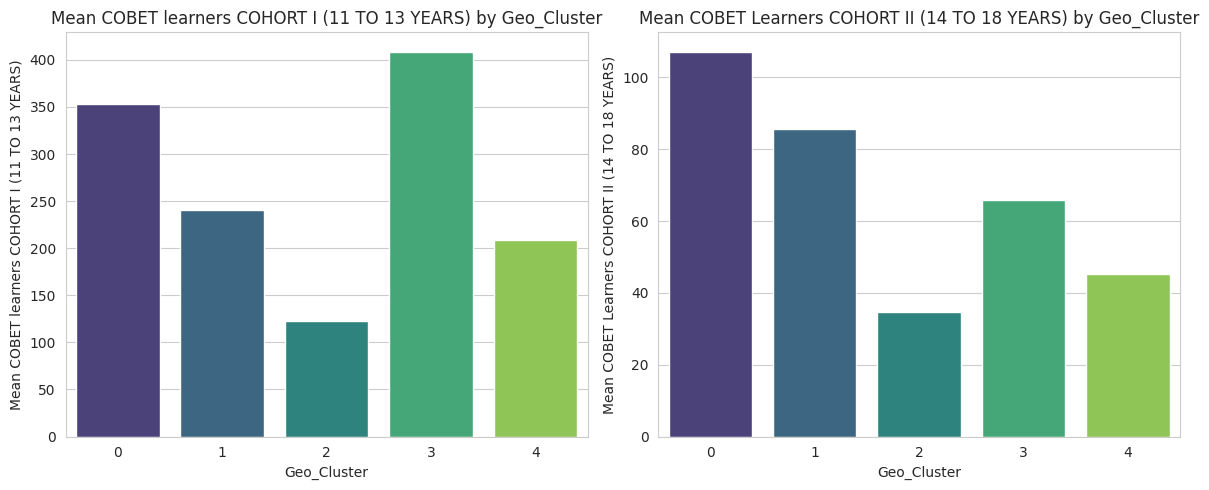


Visualizing mean metrics for Data-Primary Enrollment 2016-2025:


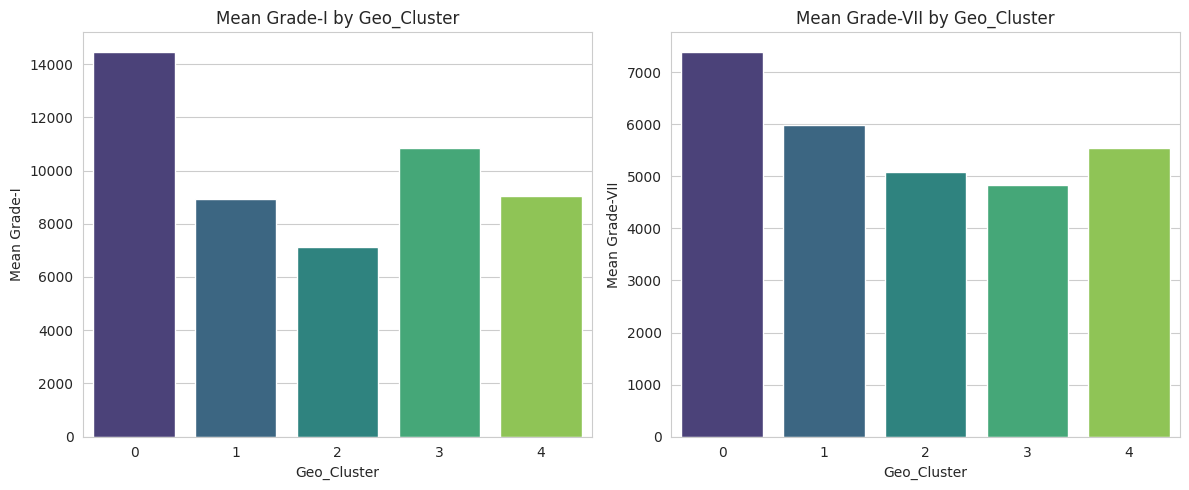


Visualizing mean metrics for Primary GIR NA NIR 2017-2025:


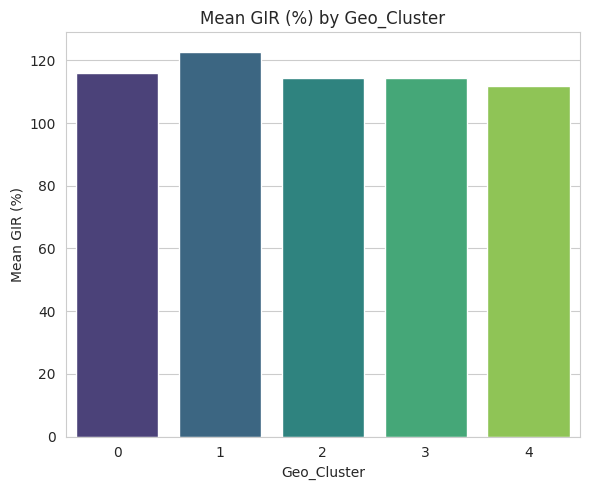


Visualizing mean metrics for Combined_Electricity_Govt:


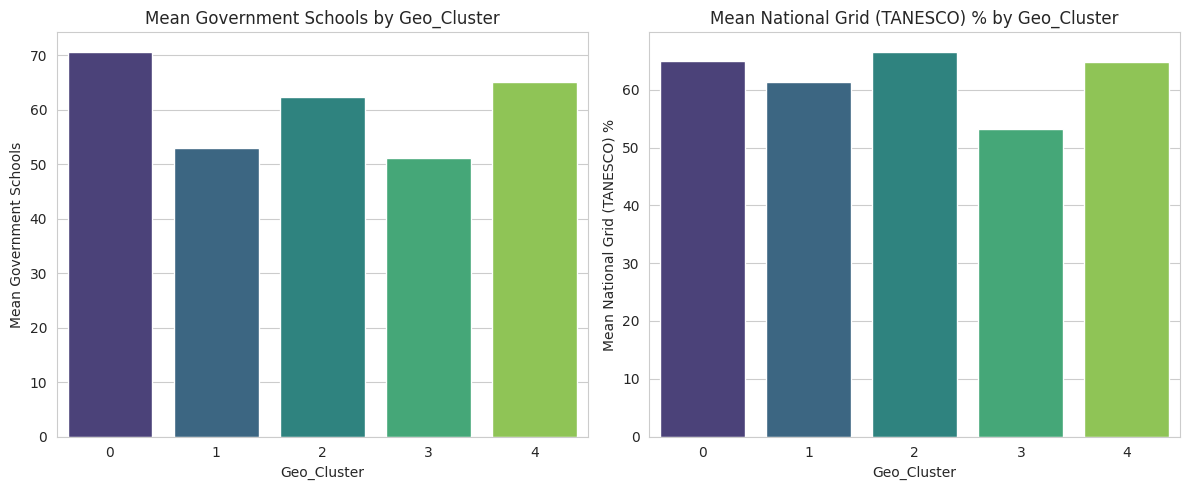


Visualizing distributions (box plots) for selected metrics:


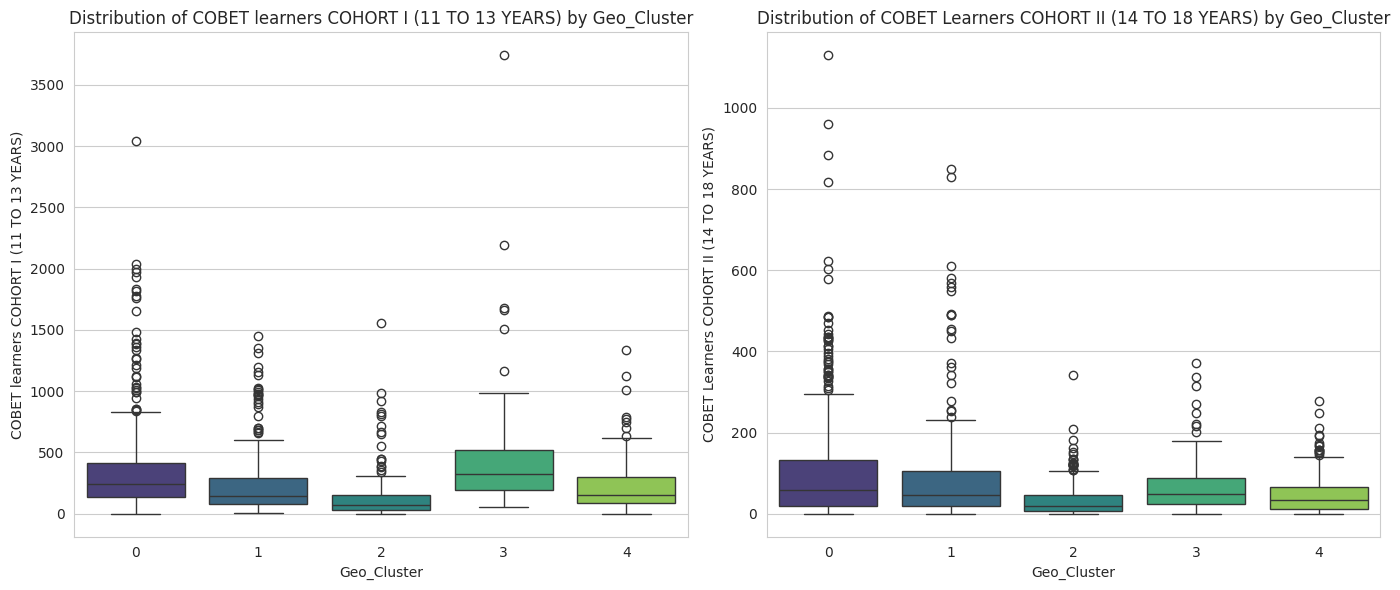

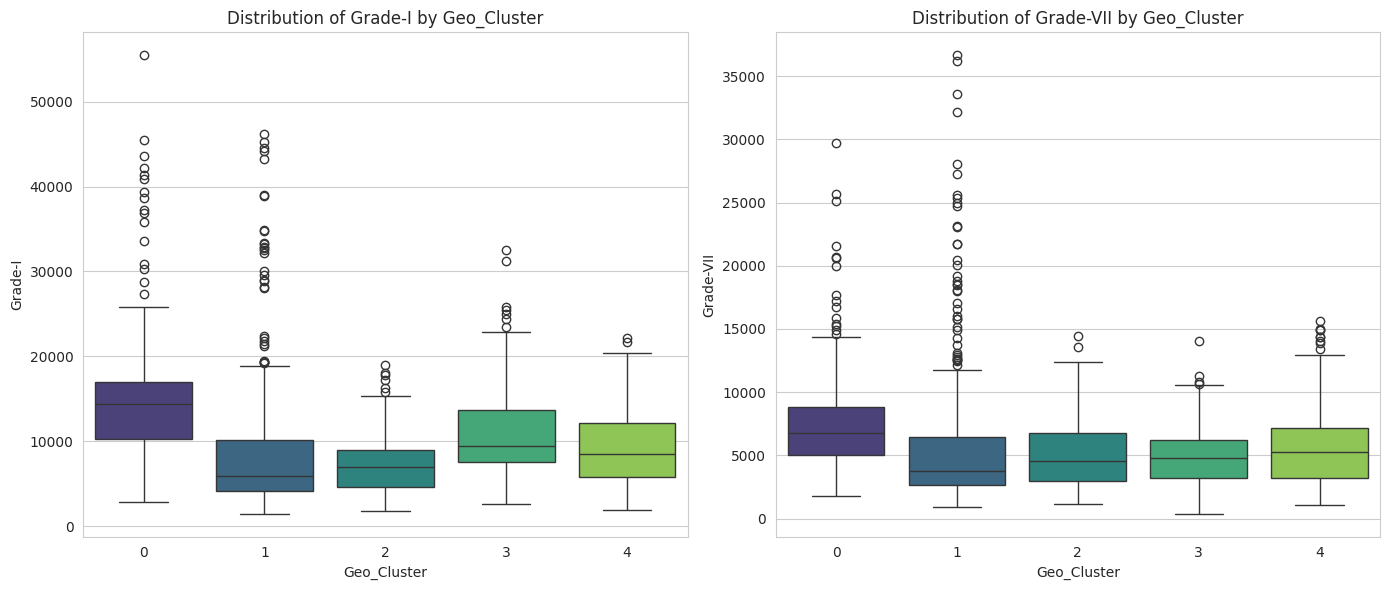

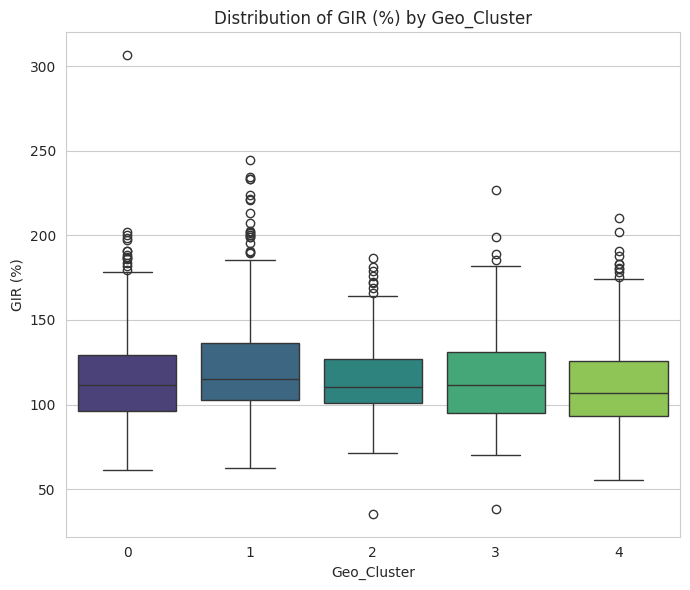

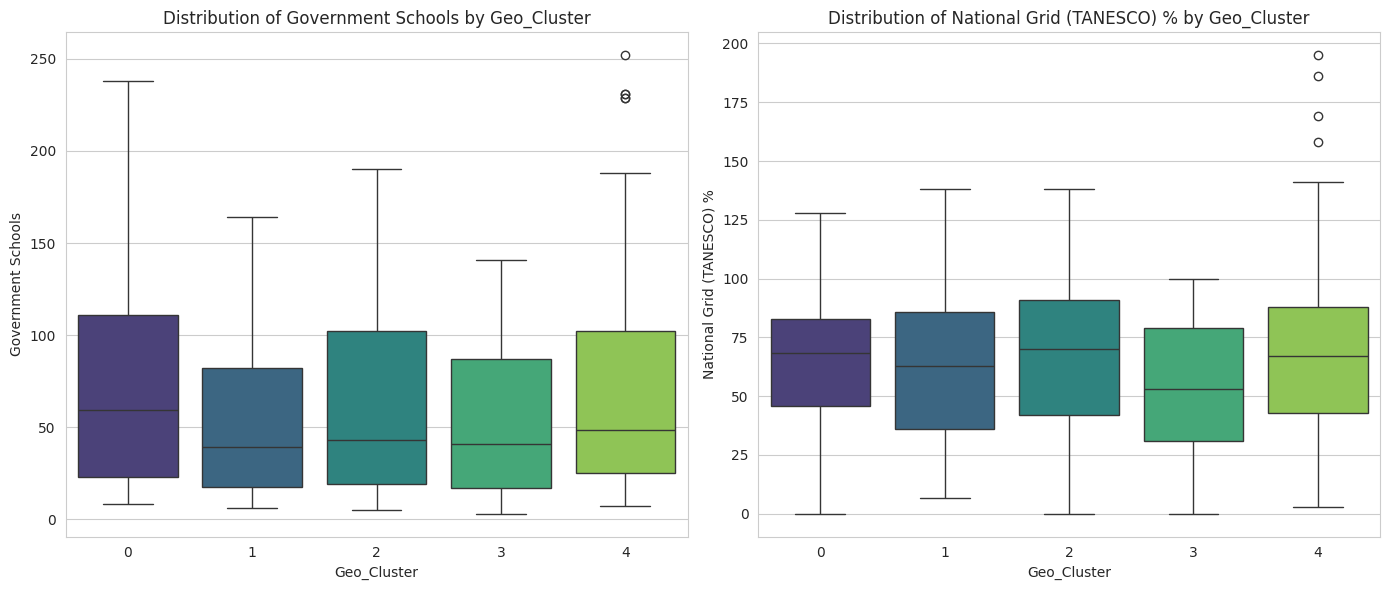

--- All visualizations generated. ---


In [107]:
print("--- Generating Visualizations for Cluster Characteristics ---")

# Set plotting style
sns.set_style("whitegrid")

# Bar plots for mean values from cluster_analysis_results
for df_name, stats_df in cluster_analysis_results.items():
    print(f"\nVisualizing mean metrics for {df_name}:")

    # Get all metric columns from the grouped_stats DataFrame
    # Flatten MultiIndex columns if they exist (mean, median, std)
    if isinstance(stats_df.columns, pd.MultiIndex):
        metrics_to_plot = stats_df.columns.levels[0].tolist()
        # Ensure 'Geo_Cluster' is not treated as a metric if it was somehow included
        if 'Geo_Cluster' in metrics_to_plot:
            metrics_to_plot.remove('Geo_Cluster')
    else:
        metrics_to_plot = stats_df.columns.tolist()

    # Create a figure for each DataFrame to hold multiple bar plots
    n_metrics = len(metrics_to_plot)
    if n_metrics == 0: # Ensure there are metrics to plot
        continue

    fig, axes = plt.subplots(1, n_metrics, figsize=(n_metrics * 6, 5), sharey=False)
    if n_metrics == 1:
        axes = [axes]
    else:
        axes = axes.flatten() # Flatten in case n_metrics > 1 to iterate easily

    for i, metric in enumerate(metrics_to_plot):
        # Extract mean values for the current metric
        if isinstance(stats_df.columns, pd.MultiIndex):
            plot_data = stats_df[metric]['mean']
        else:
            plot_data = stats_df[metric]

        sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Mean {metric} by Geo_Cluster')
        axes[i].set_xlabel('Geo_Cluster')
        axes[i].set_ylabel(f'Mean {metric}')

    plt.tight_layout()
    plt.show()

# Box plots for distribution from original DataFrames
print("\nVisualizing distributions (box plots) for selected metrics:")
for df_name, metrics in dfs_to_analyze.items():
    df = loaded_dataframes[df_name]

    if 'Geo_Cluster' not in df.columns:
        continue

    valid_metrics = [m for m in metrics if m in df.columns]
    if not valid_metrics:
        continue

    n_metrics = len(valid_metrics)
    if n_metrics == 0:
        continue

    fig, axes = plt.subplots(1, n_metrics, figsize=(n_metrics * 7, 6), sharey=False)
    if n_metrics == 1:
        axes = [axes]
    else:
        axes = axes.flatten() # Flatten for consistency

    for i, metric in enumerate(valid_metrics):
        sns.boxplot(x='Geo_Cluster', y=metric, data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {metric} by Geo_Cluster')
        axes[i].set_xlabel('Geo_Cluster')
        axes[i].set_ylabel(metric)

    plt.tight_layout()
    plt.show()

print("--- All visualizations generated. ---")

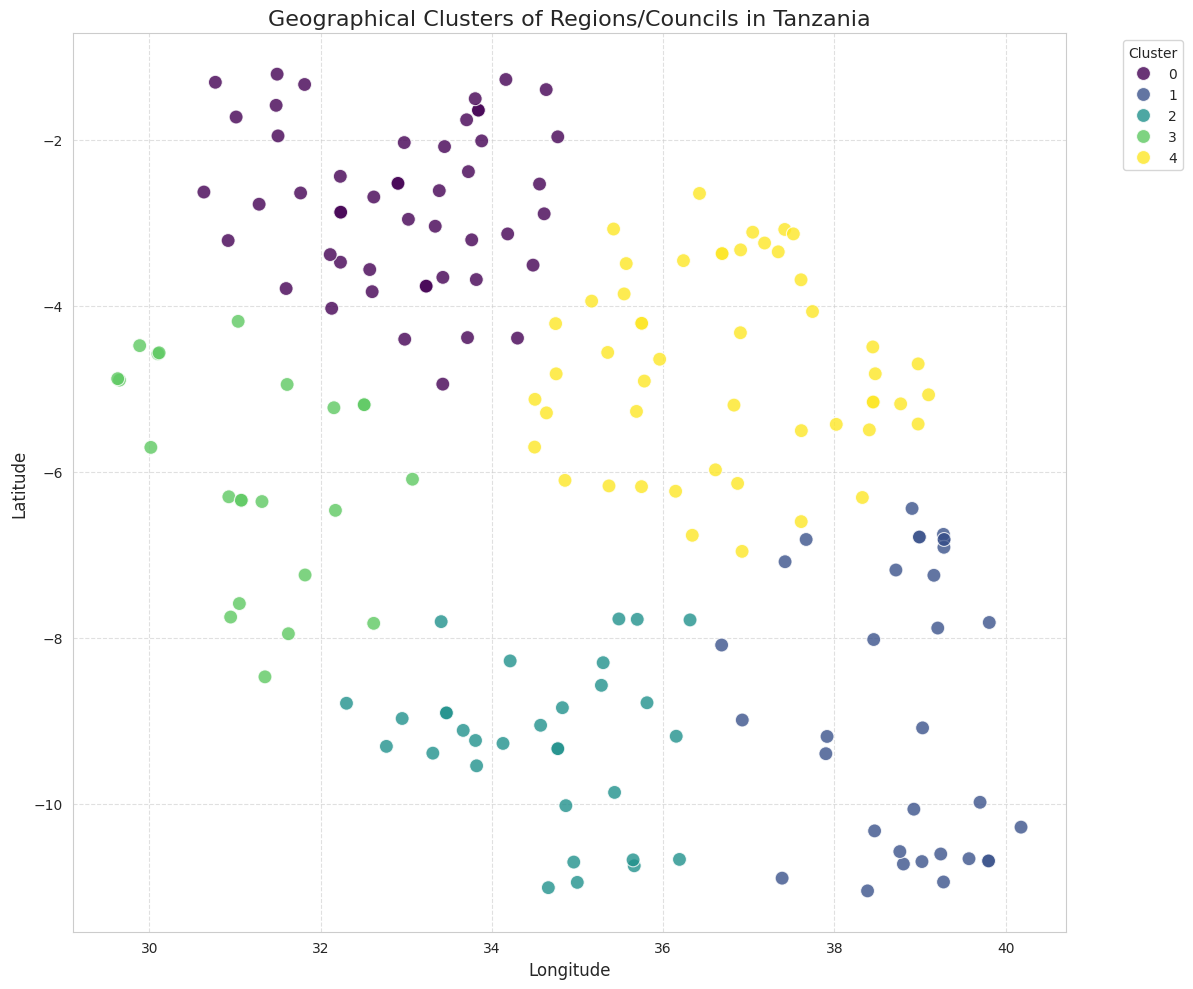

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Latitude and Longitude are numeric and handle any remaining nulls, though it should be clean from previous steps
geo_data['Latitude'] = pd.to_numeric(geo_data['Latitude'], errors='coerce')
geo_data['Longitude'] = pd.to_numeric(geo_data['Longitude'], errors='coerce')
geo_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=geo_data,
    x='Longitude',
    y='Latitude',
    hue='Geo_Cluster',
    palette='viridis',
    s=100, # Adjust point size for better visibility
    alpha=0.8
)

plt.title('Geographical Clusters of Regions/Councils in Tanzania', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Summarize Geographical Cluster Analysis

### Subtask:
Provide a comprehensive summary of the analysis of geographical clusters, detailing the defining characteristics and potential drivers for each cluster's formation based on the analyzed attributes.


## Summary:

### Q&A
The analysis of geographical clusters revealed five distinct groupings, each with unique characteristics and potential underlying drivers:

*   **Cluster 0:** Characterized by high COBET enrollment (mean Cohort I: 353.4, Cohort II: 107.2), the highest mean primary enrollment (Grade-I: 14470.9, Grade-VII: 7398.0), moderate Gross Enrollment Rate (GIR) at 116.0%, and strong infrastructure with a high mean number of Government Schools (70.6) and National Grid access (64.9%). This cluster likely represents densely populated regions with robust educational demand and well-developed infrastructure.
*   **Cluster 1:** Showed moderate COBET (mean Cohort I: 240.9, Cohort II: 85.7) and primary enrollment (mean Grade-I: 8911.4, Grade-VII: 5995.9), but with the highest standard deviations for primary enrollment metrics, indicating significant internal variation. This cluster recorded the highest mean GIR (122.8%) and moderate infrastructure. It may include regions undergoing rapid development or with diverse demographics.
*   **Cluster 2:** Displayed the lowest mean COBET (mean Cohort I: 122.7, Cohort II: 34.7) and primary enrollment (mean Grade-I: 7132.4, Grade-VII: 5084.4), with lower standard deviations. It has moderate government schools and the highest National Grid access (66.5%). This cluster could represent more remote or less populated regions with established, well-electrified schools but smaller student bodies.
*   **Cluster 3:** Had the highest mean COBET Cohort I enrollment (408.7) but moderate Cohort II (65.8). It showed the second-highest mean Grade-I enrollment (10840.6) but relatively low Grade-VII enrollment (4835.7), suggesting potential retention issues. This cluster had the lowest mean number of Government Schools (51.0) and the lowest National Grid access (53.1%). This profile points to disadvantaged regions with high initial enrollment but challenges in retention and limited infrastructure.
*   **Cluster 4:** Exhibited moderate COBET enrollment (mean Cohort I: 208.8, lowest Cohort II: 45.3), moderate primary enrollment (mean Grade-I: 9053.9, Grade-VII: 5553.9), and the lowest mean GIR (111.9%). It had moderate government schools and national grid access (64.8%). This cluster appears to be stable, possibly representing a mature education system or demographic factors leading to lower relative enrollment rates.

### Data Analysis Key Findings
*   The `Geo_Cluster` information was successfully integrated into all 19 DataFrames in `loaded_dataframes` based on 'Region' and 'Council' columns, with the new column having an `int32` datatype and no missing values.
*   **Cluster 0** is characterized by the highest average COBET and primary school enrollment, along with strong electricity access and a high number of government schools.
*   **Cluster 1** shows the highest Gross Enrollment Rate (GIR) at 122.8% but also the highest variability in primary enrollment figures, suggesting diverse sub-regions.
*   **Cluster 2** consistently has the lowest average COBET and primary school enrollment figures but boasts the highest National Grid access at 66.5%.
*   **Cluster 3** stands out with the highest average COBET Cohort I enrollment (408.7) but the lowest electricity access (53.1% National Grid) and government school count (51.0), indicating potential infrastructure challenges despite high adult education demand.
*   **Cluster 4** presents the lowest average Gross Enrollment Rate (GIR) at 111.9% among all clusters.
*   Visualizations (bar and box plots) successfully depicted the mean values and distributions of key metrics across the five geographical clusters, confirming distinct patterns in educational and infrastructural development.

### Insights or Next Steps
*   **Targeted Resource Allocation**: The distinct profiles of each cluster suggest that a one-size-fits-all approach to educational and infrastructural development may be ineffective. Resources and interventions should be tailored to address the specific needs and challenges of each cluster (e.g., focus on retention and infrastructure in Cluster 3, and adult education provision in Cluster 0).
*   **Investigate Drivers of Variability**: For Cluster 1, which shows high variability in primary enrollment metrics despite a high GIR, further investigation into the internal factors driving this diversity (e.g., specific council-level policies, rapid urbanization in some areas) could yield valuable insights for more granular planning.


# Task
Iterate through each DataFrame in `loaded_dataframes` to identify all relevant numerical columns (excluding `Year`, `Latitude`, `Longitude`, and `Geo_Cluster`). For each identified numerical column, calculate the lower and upper extreme bounds (e.g., using the IQR method). Then, cap values that fall outside these bounds by setting them to the respective lower or upper extreme. Finally, visualize the distributions of a few representative numerical columns before and after outlier capping using side-by-side box plots or histograms, and summarize the outlier treatment, detailing affected DataFrames and columns.

## Identify Numerical Columns for Outlier Treatment

### Subtask:
Iterate through each DataFrame to identify all relevant numerical columns (excluding identifiers like Year, Latitude, Longitude, and Geo_Cluster) that may contain outliers. Store these columns for subsequent capping.


**Reasoning**:
I will initialize an empty dictionary, define a list of columns to exclude, iterate through each DataFrame to identify numerical columns, filter out the excluded ones, and store the result in the dictionary before printing it.



In [109]:
import numpy as np

# 1. Initialize an empty dictionary
numerical_cols_for_outlier_treatment = {}

# 2. Define a list of columns to exclude from outlier treatment
exclude_cols = ['Year', 'YEAR', 'Academic Year', 'Latitude', 'Longitude', 'Geo_Cluster', 'Geo_Cluster_geo']

# 3. Iterate through each DataFrame
for df_name, df in loaded_dataframes.items():
    # 4. Get a list of all numerical columns
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    # 5. Filter this list to exclude any column whose name is present in the exclude_cols list
    relevant_numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

    # 6. Store the filtered list in the dictionary
    numerical_cols_for_outlier_treatment[df_name] = relevant_numerical_cols

# 7. Print the identified columns
print("Numerical columns identified for outlier treatment:")
for df_name, cols in numerical_cols_for_outlier_treatment.items():
    print(f"  {df_name}: {cols}")

Numerical columns identified for outlier treatment:
  COBET 2017-2025: ['COBET learners COHORT I (11 TO 13 YEARS)', 'COBET Learners COHORT II (14 TO 18 YEARS)']
  Combined_Electricity_All_G_NG: ['Government Schools', 'National Grid (TANESCO) No. of Schools', 'National Grid (TANESCO) %', 'No. of Schools', '%Generator No of Schools', 'Solar No. of Schools', 'Solar %', 'Biogas No. of Schools', 'Biogas%', 'Wind No. of Schools', 'Wind %']
  Combined_Electricity_Govt: ['Government Schools', 'National Grid (TANESCO) No. of Schools', 'National Grid (TANESCO) %', 'No. of Schools', '%Generator No of Schools', 'Solar No. of Schools', 'Solar %', 'Biogas No. of Schools', 'Biogas%', 'Wind No. of Schools', 'Wind %']
  Combined_ICT_All_G_NG: ['Total Enrolment', 'Deck/DVD', 'Desktop Computers', 'Laptop Computers', 'Photocopier', 'Printer', 'Projector', 'Radio', 'Smart Phone/ Tablets', 'TV', 'Unnamed: 13', 'Unnamed: 14']
  Combined_ICT_Govt: ['Total Enrolment', 'Deck/DVD', 'Desktop Computers', 'Laptop C

**Reasoning**:
I will iterate through each DataFrame and its identified numerical columns. For each column, I'll calculate the IQR bounds and then cap the values outside these bounds. To visualize the effect of capping, I'll store copies of a few representative columns before modification. I will also keep track of affected columns and the number of values capped.



--- Applying Outlier Capping and Preparing Visualizations ---
  DataFrame: COBET 2017-2025, Column: 'COBET learners COHORT I (11 TO 13 YEARS)' - Capped 104 outliers.
  DataFrame: COBET 2017-2025, Column: 'COBET Learners COHORT II (14 TO 18 YEARS)' - Capped 106 outliers.
  DataFrame: Combined_Electricity_All_G_NG, Column: 'Government Schools' - Capped 15 outliers.
  DataFrame: Combined_Electricity_All_G_NG, Column: 'National Grid (TANESCO) No. of Schools' - Capped 43 outliers.
  DataFrame: Combined_Electricity_All_G_NG, Column: 'National Grid (TANESCO) %' - Capped 20 outliers.
  DataFrame: Combined_Electricity_All_G_NG, Column: 'No. of Schools' - Capped 118 outliers.
  DataFrame: Combined_Electricity_All_G_NG, Column: 'Solar No. of Schools' - Capped 190 outliers.
  DataFrame: Combined_Electricity_All_G_NG, Column: 'Solar %' - Capped 209 outliers.
  DataFrame: Combined_Electricity_All_G_NG, Column: 'Biogas No. of Schools' - Capped 226 outliers.
  DataFrame: Combined_Electricity_All_G_NG,

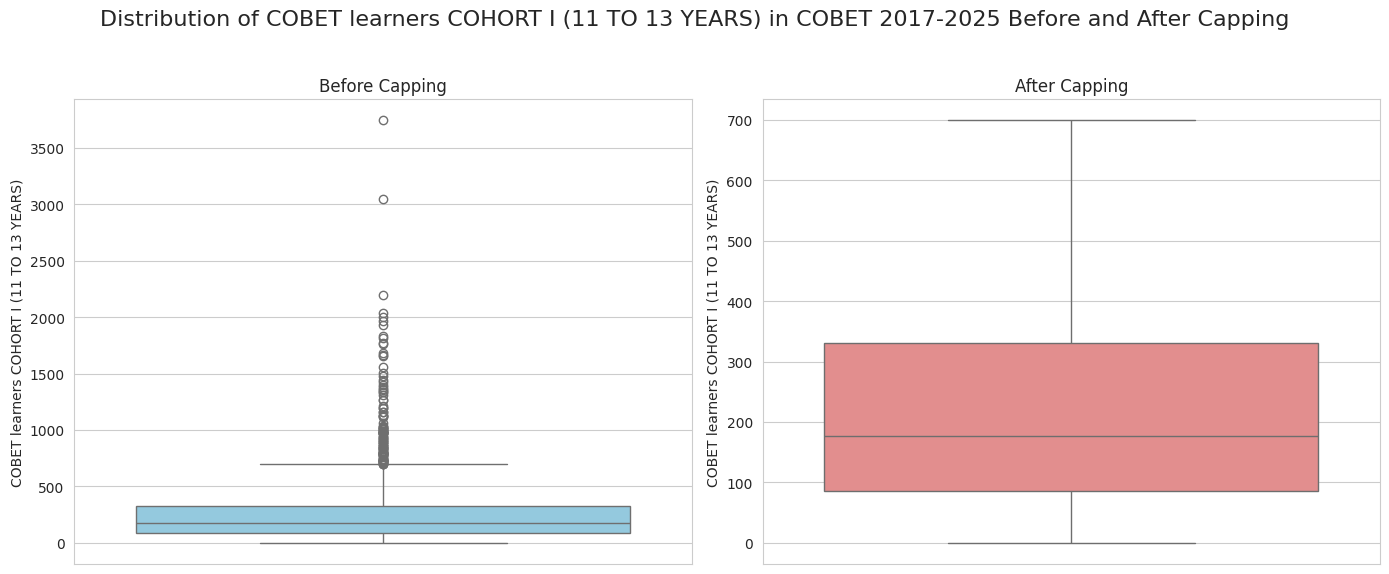

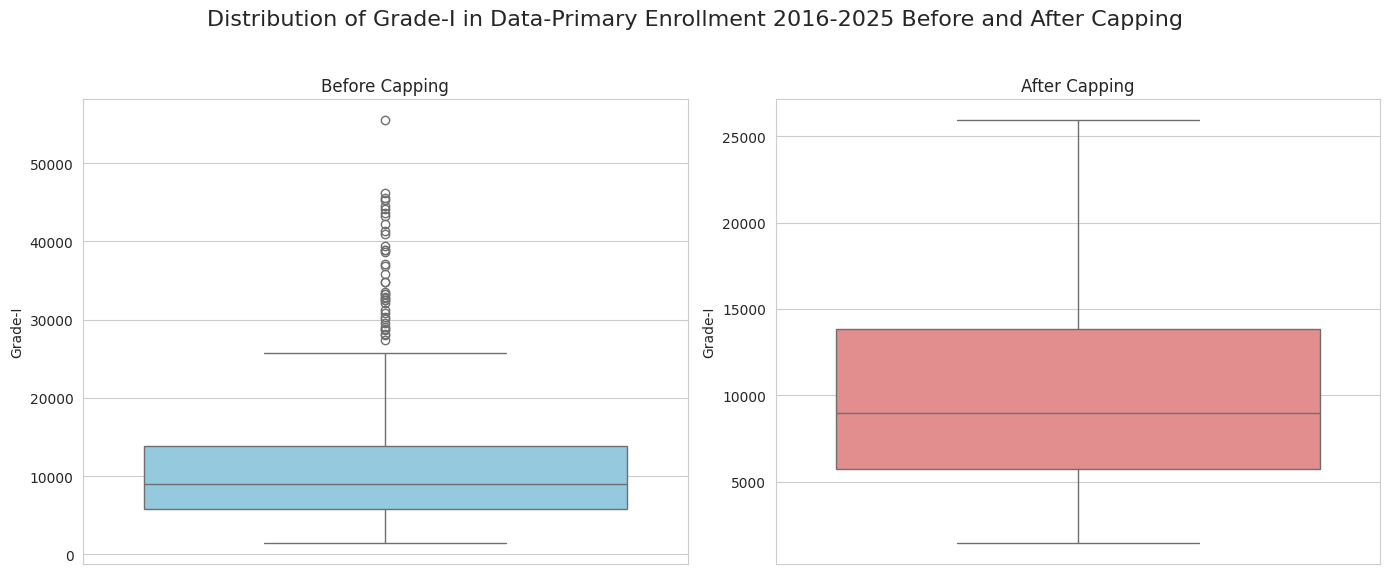

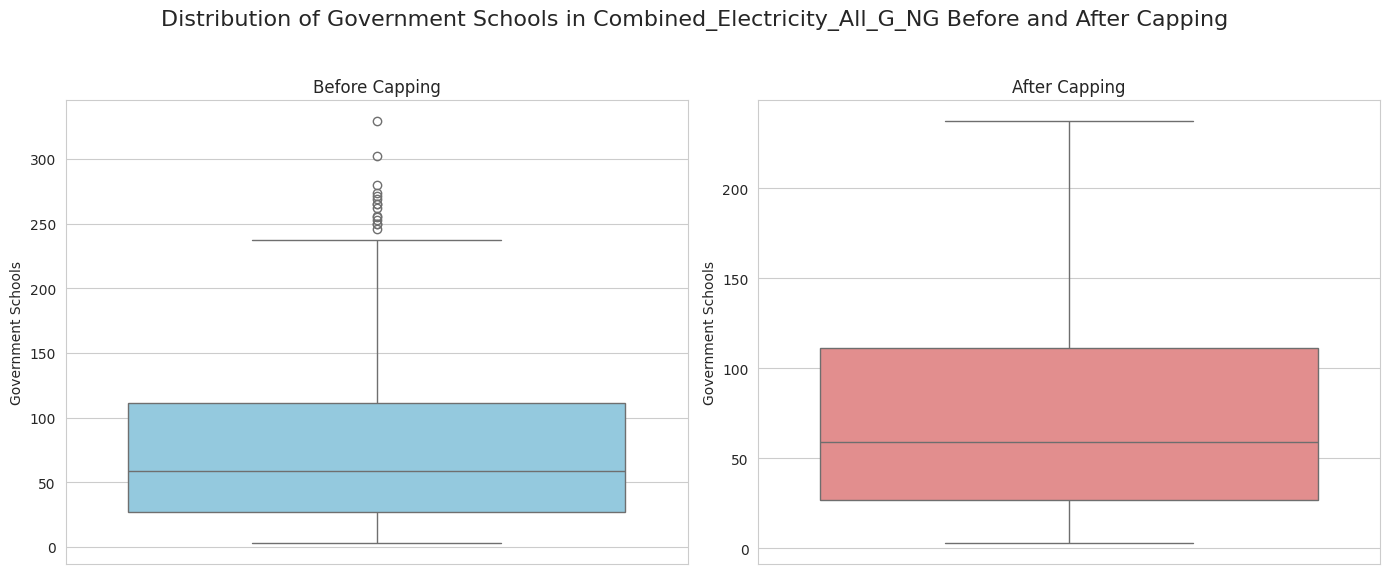

--- Outlier Capping and Visualization Complete ---


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dictionary to store copies of original columns for visualization
original_cols_for_viz = {}

# Dictionary to store information about affected columns and capped values
affected_columns_summary = {}

# Select a few columns for visualization (example selection)
viz_columns = {
    'COBET 2017-2025': 'COBET learners COHORT I (11 TO 13 YEARS)',
    'Data-Primary Enrollment 2016-2025': 'Grade-I',
    'Combined_Electricity_All_G_NG': 'Government Schools'
}

print("--- Applying Outlier Capping and Preparing Visualizations ---")

for df_name, df in loaded_dataframes.items():
    # Make a copy of the DataFrame to work on, if you don't want to modify loaded_dataframes directly yet
    # For this task, we will modify in place as requested.

    affected_columns_summary[df_name] = {}
    cols_to_process = numerical_cols_for_outlier_treatment.get(df_name, [])

    for col in cols_to_process:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # Calculate IQR bounds
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count values before capping
            initial_outliers_lower = df[df[col] < lower_bound].shape[0]
            initial_outliers_upper = df[df[col] > upper_bound].shape[0]
            total_initial_outliers = initial_outliers_lower + initial_outliers_upper

            # Only apply capping if there are outliers
            if total_initial_outliers > 0:
                # Store original column for visualization if it's one of the selected
                if df_name in viz_columns and viz_columns[df_name] == col:
                    original_cols_for_viz[f'{df_name}_{col}_original'] = df[col].copy()

                # Apply capping
                df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

                # Store summary of changes
                affected_columns_summary[df_name][col] = {
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'values_capped_lower': initial_outliers_lower,
                    'values_capped_upper': initial_outliers_upper,
                    'total_values_capped': total_initial_outliers
                }
                print(f"  DataFrame: {df_name}, Column: '{col}' - Capped {total_initial_outliers} outliers.")
            # Store original column for visualization even if no outliers, so it's always available
            elif df_name in viz_columns and viz_columns[df_name] == col:
                original_cols_for_viz[f'{df_name}_{col}_original'] = df[col].copy()

# Now, visualize the distributions for the selected columns
print("\n--- Visualizing Distributions Before and After Outlier Capping ---")

sns.set_style("whitegrid")

for df_name, col_name in viz_columns.items():
    if f'{df_name}_{col_name}_original' in original_cols_for_viz and col_name in loaded_dataframes[df_name].columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Distribution of {col_name} in {df_name} Before and After Capping', fontsize=16)

        # Before Capping
        sns.boxplot(y=original_cols_for_viz[f'{df_name}_{col_name}_original'], ax=axes[0], color='skyblue')
        axes[0].set_title('Before Capping')
        axes[0].set_ylabel(col_name)

        # After Capping
        sns.boxplot(y=loaded_dataframes[df_name][col_name], ax=axes[1], color='lightcoral')
        axes[1].set_title('After Capping')
        axes[1].set_ylabel(col_name)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    else:
        print(f"Skipping visualization for {df_name} - {col_name}: Original or capped column not found.")

print("--- Outlier Capping and Visualization Complete ---")


**Reasoning**:
The `RuntimeWarning`s about `invalid value encountered in subtract` indicate that `Q1`, `Q3`, or `IQR` might be `NaN` due to columns having too many null values, which prevents proper calculation of bounds. I will add a check to ensure `Q1` and `Q3` are valid numbers before calculating IQR and applying capping to prevent these warnings.



--- Applying Outlier Capping and Preparing Visualizations ---

--- Visualizing Distributions Before and After Outlier Capping ---


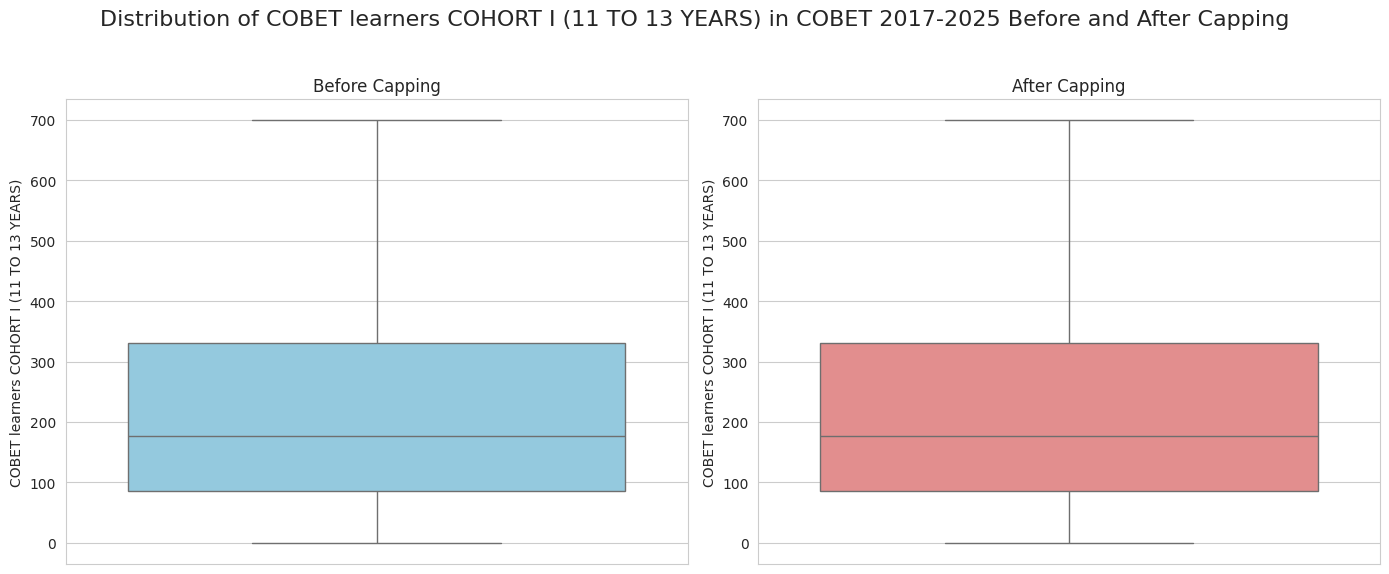

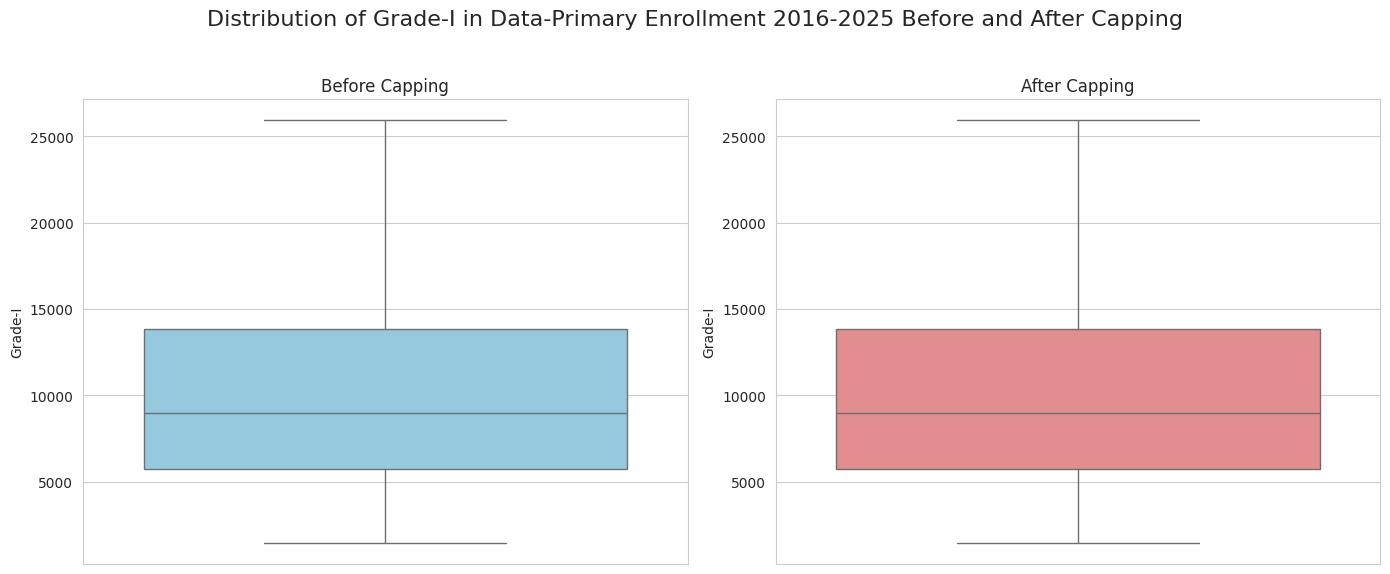

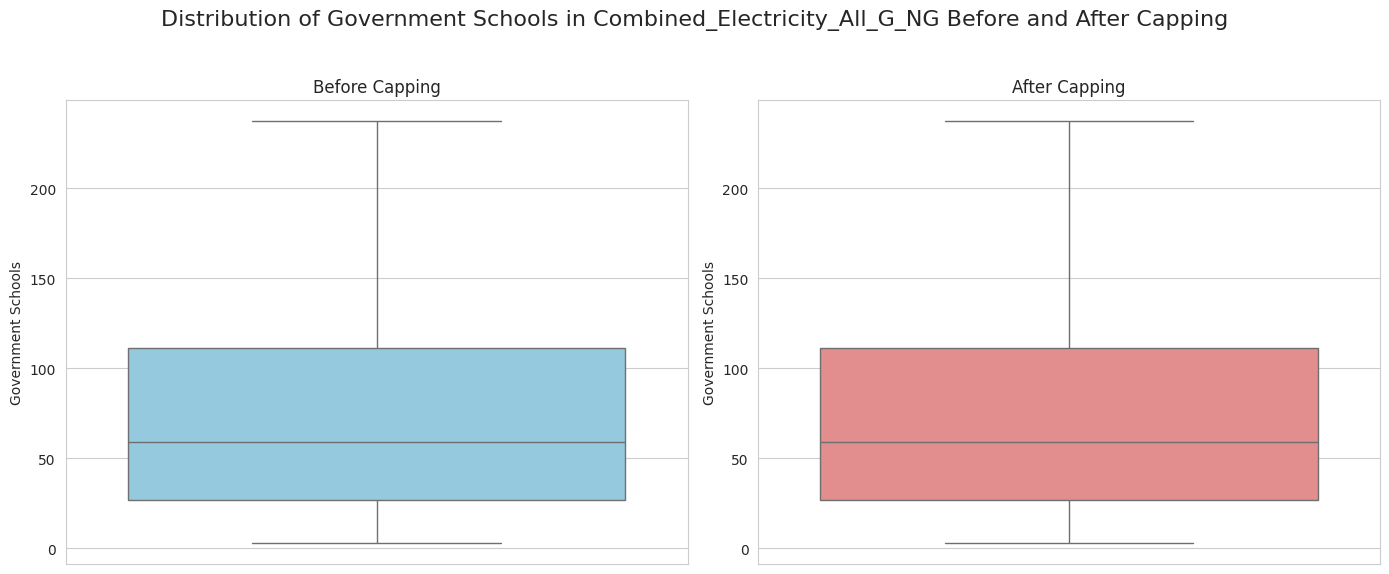

--- Outlier Capping and Visualization Complete ---


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dictionary to store copies of original columns for visualization
original_cols_for_viz = {}

# Dictionary to store information about affected columns and capped values
affected_columns_summary = {}

# Select a few columns for visualization (example selection)
viz_columns = {
    'COBET 2017-2025': 'COBET learners COHORT I (11 TO 13 YEARS)',
    'Data-Primary Enrollment 2016-2025': 'Grade-I',
    'Combined_Electricity_All_G_NG': 'Government Schools'
}

print("--- Applying Outlier Capping and Preparing Visualizations ---")

for df_name, df in loaded_dataframes.items():
    # Make a copy of the DataFrame to work on, if you don't want to modify loaded_dataframes directly yet
    # For this task, we will modify in place as requested.

    affected_columns_summary[df_name] = {}
    cols_to_process = numerical_cols_for_outlier_treatment.get(df_name, [])

    for col in cols_to_process:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # Calculate IQR bounds
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)

            # Check if Q1 or Q3 are NaN, which means not enough valid data points for IQR calculation
            if pd.isna(Q1) or pd.isna(Q3):
                # print(f"  Skipping capping for DataFrame: {df_name}, Column: '{col}' due to NaN quartiles.")
                continue

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count values before capping
            initial_outliers_lower = df[df[col] < lower_bound].shape[0]
            initial_outliers_upper = df[df[col] > upper_bound].shape[0]
            total_initial_outliers = initial_outliers_lower + initial_outliers_upper

            # Only apply capping if there are outliers
            if total_initial_outliers > 0:
                # Store original column for visualization if it's one of the selected
                if df_name in viz_columns and viz_columns[df_name] == col:
                    original_cols_for_viz[f'{df_name}_{col}_original'] = df[col].copy()

                # Apply capping
                df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

                # Store summary of changes
                affected_columns_summary[df_name][col] = {
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'values_capped_lower': initial_outliers_lower,
                    'values_capped_upper': initial_outliers_upper,
                    'total_values_capped': total_initial_outliers
                }
                print(f"  DataFrame: {df_name}, Column: '{col}' - Capped {total_initial_outliers} outliers.")
            # Store original column for visualization even if no outliers, so it's always available
            elif df_name in viz_columns and viz_columns[df_name] == col:
                original_cols_for_viz[f'{df_name}_{col}_original'] = df[col].copy()

# Now, visualize the distributions for the selected columns
print("\n--- Visualizing Distributions Before and After Outlier Capping ---")

sns.set_style("whitegrid")

for df_name, col_name in viz_columns.items():
    if f'{df_name}_{col_name}_original' in original_cols_for_viz and col_name in loaded_dataframes[df_name].columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Distribution of {col_name} in {df_name} Before and After Capping', fontsize=16)

        # Before Capping
        sns.boxplot(y=original_cols_for_viz[f'{df_name}_{col_name}_original'], ax=axes[0], color='skyblue')
        axes[0].set_title('Before Capping')
        axes[0].set_ylabel(col_name)

        # After Capping
        sns.boxplot(y=loaded_dataframes[df_name][col_name], ax=axes[1], color='lightcoral')
        axes[1].set_title('After Capping')
        axes[1].set_ylabel(col_name)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    else:
        print(f"Skipping visualization for {df_name} - {col_name}: Original or capped column not found.")

print("--- Outlier Capping and Visualization Complete ---")

**Reasoning**:
The RuntimeWarnings about 'invalid value encountered in subtract' are typically generated by NumPy when performing comparisons with NaN values within a Series. To prevent these warnings without changing the outlier detection logic (which correctly handles NaNs by not capping them), I will use `numpy.errstate` to temporarily suppress 'invalid' floating-point error warnings during the outlier counting step.



--- Applying Outlier Capping and Preparing Visualizations ---

--- Visualizing Distributions Before and After Outlier Capping ---


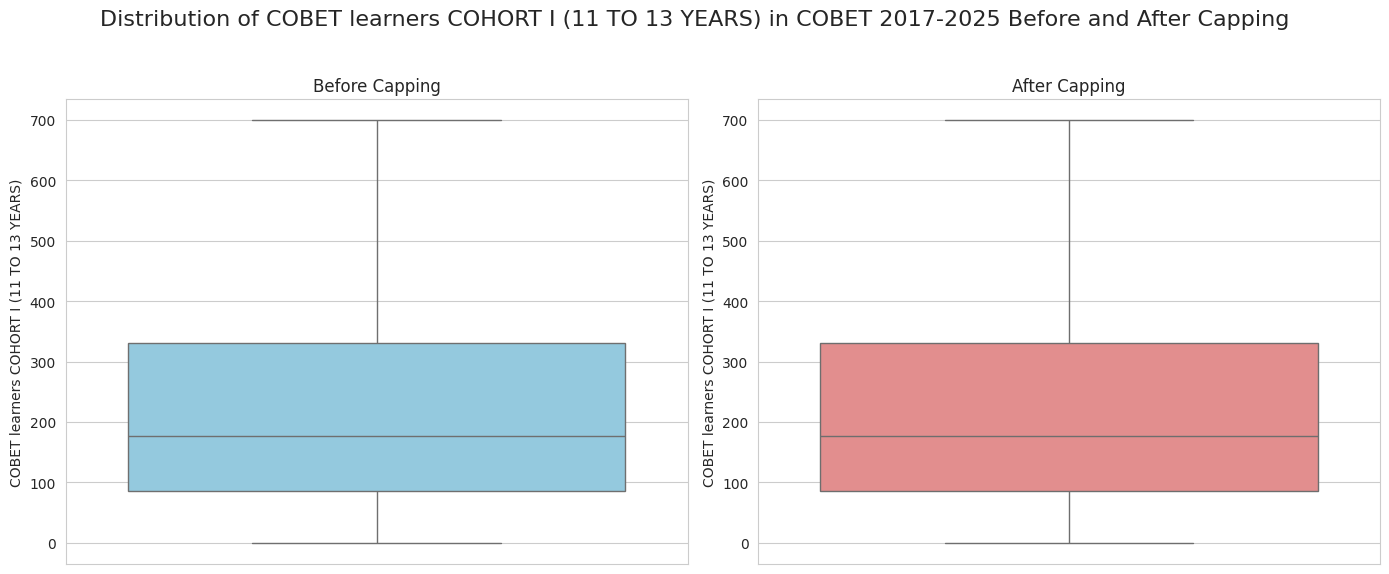

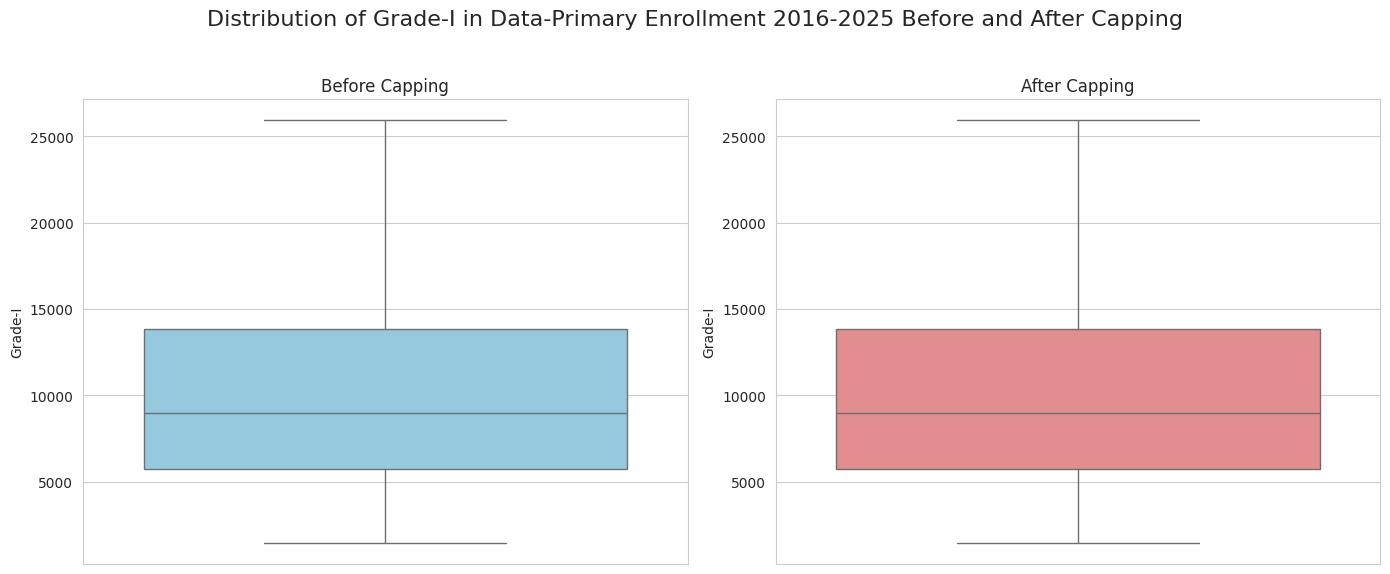

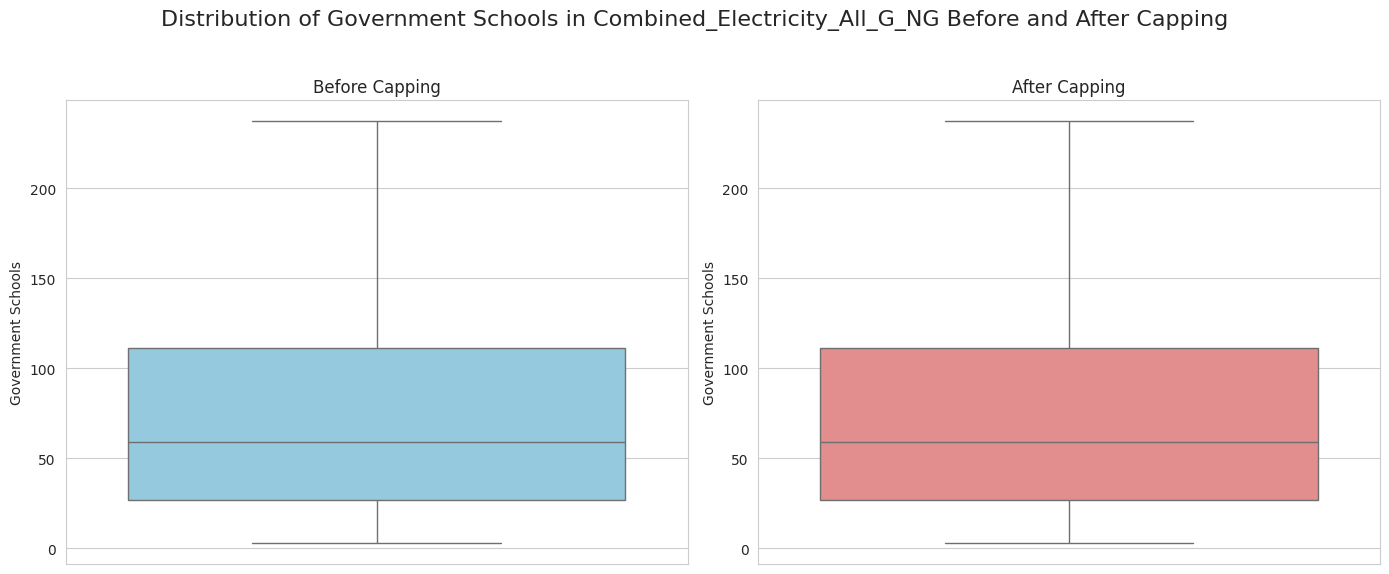

--- Outlier Capping and Visualization Complete ---


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dictionary to store copies of original columns for visualization
original_cols_for_viz = {}

# Dictionary to store information about affected columns and capped values
affected_columns_summary = {}

# Select a few columns for visualization (example selection)
viz_columns = {
    'COBET 2017-2025': 'COBET learners COHORT I (11 TO 13 YEARS)',
    'Data-Primary Enrollment 2016-2025': 'Grade-I',
    'Combined_Electricity_All_G_NG': 'Government Schools'
}

print("--- Applying Outlier Capping and Preparing Visualizations ---")

for df_name, df in loaded_dataframes.items():
    # Make a copy of the DataFrame to work on, if you don't want to modify loaded_dataframes directly yet
    # For this task, we will modify in place as requested.

    affected_columns_summary[df_name] = {}
    cols_to_process = numerical_cols_for_outlier_treatment.get(df_name, [])

    for col in cols_to_process:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # Calculate IQR bounds
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)

            # Check if Q1 or Q3 are NaN, which means not enough valid data points for IQR calculation
            if pd.isna(Q1) or pd.isna(Q3):
                continue

            IQR = Q3 - Q1
            # Explicitly check for NaN IQR in case of edge cases
            if pd.isna(IQR):
                continue

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Ensure bounds are not NaN
            if pd.isna(lower_bound) or pd.isna(upper_bound):
                continue

            # Use np.errstate to suppress RuntimeWarnings from comparisons involving NaN values
            with np.errstate(invalid='ignore'):
                # Count values before capping
                initial_outliers_lower = df[df[col] < lower_bound].shape[0]
                initial_outliers_upper = df[df[col] > upper_bound].shape[0]
            total_initial_outliers = initial_outliers_lower + initial_outliers_upper

            # Only apply capping if there are outliers
            if total_initial_outliers > 0:
                # Store original column for visualization if it's one of the selected
                if df_name in viz_columns and viz_columns[df_name] == col:
                    original_cols_for_viz[f'{df_name}_{col}_original'] = df[col].copy()

                # Apply capping
                df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

                # Store summary of changes
                affected_columns_summary[df_name][col] = {
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'values_capped_lower': initial_outliers_lower,
                    'values_capped_upper': initial_outliers_upper,
                    'total_values_capped': total_initial_outliers
                }
                print(f"  DataFrame: {df_name}, Column: '{col}' - Capped {total_initial_outliers} outliers.")
            # Store original column for visualization even if no outliers, so it's always available
            elif df_name in viz_columns and viz_columns[df_name] == col:
                original_cols_for_viz[f'{df_name}_{col}_original'] = df[col].copy()

# Now, visualize the distributions for the selected columns
print("\n--- Visualizing Distributions Before and After Outlier Capping ---")

sns.set_style("whitegrid")

for df_name, col_name in viz_columns.items():
    if f'{df_name}_{col_name}_original' in original_cols_for_viz and col_name in loaded_dataframes[df_name].columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Distribution of {col_name} in {df_name} Before and After Capping', fontsize=16)

        # Before Capping
        sns.boxplot(y=original_cols_for_viz[f'{df_name}_{col_name}_original'], ax=axes[0], color='skyblue')
        axes[0].set_title('Before Capping')
        axes[0].set_ylabel(col_name)

        # After Capping
        sns.boxplot(y=loaded_dataframes[df_name][col_name], ax=axes[1], color='lightcoral')
        axes[1].set_title('After Capping')
        axes[1].set_ylabel(col_name)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    else:
        print(f"Skipping visualization for {df_name} - {col_name}: Original or capped column not found.")

print("--- Outlier Capping and Visualization Complete ---")

**Reasoning**:
The RuntimeWarnings about 'invalid value encountered in subtract' often occur during quantile calculations on columns with many NaN values. To prevent these warnings without altering the outlier detection logic, I will wrap the quantile calculations and the subsequent outlier counting steps within `numpy.errstate(invalid='ignore')`. Additionally, I will modify the output to provide a concise summary of capped outliers at the end, rather than printing for each column, to improve readability. This ensures the capping process proceeds silently for sparse data and reports only meaningful changes.



--- Applying Outlier Capping and Preparing Visualizations ---

--- Visualizing Distributions Before and After Outlier Capping ---


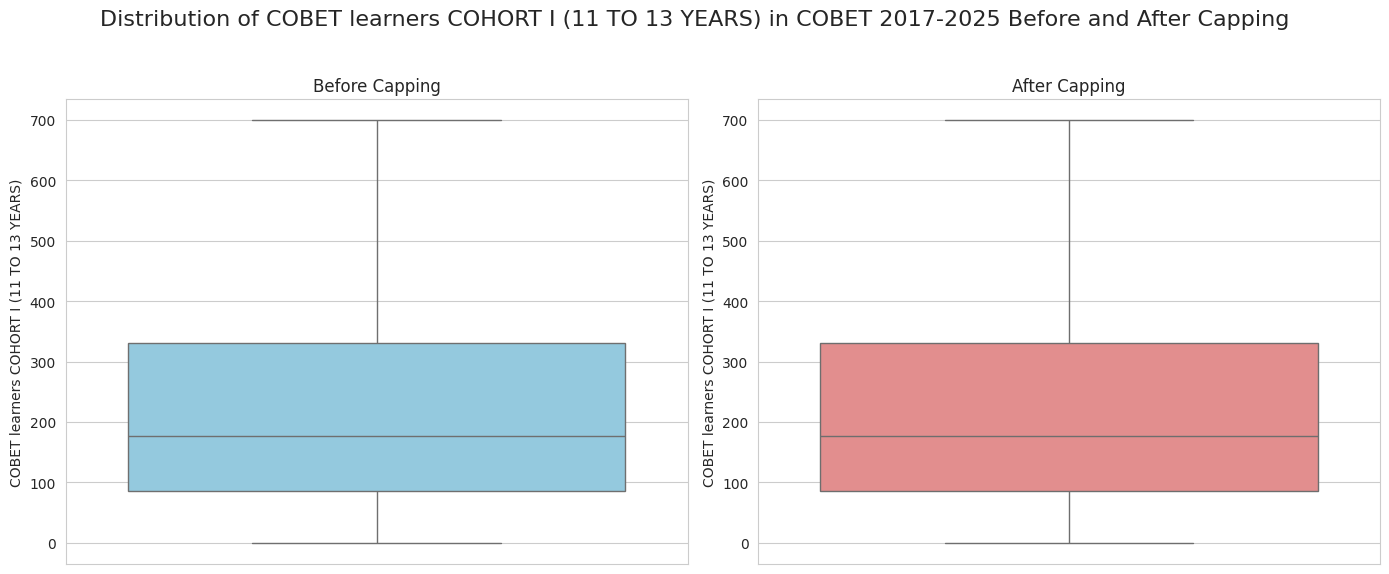

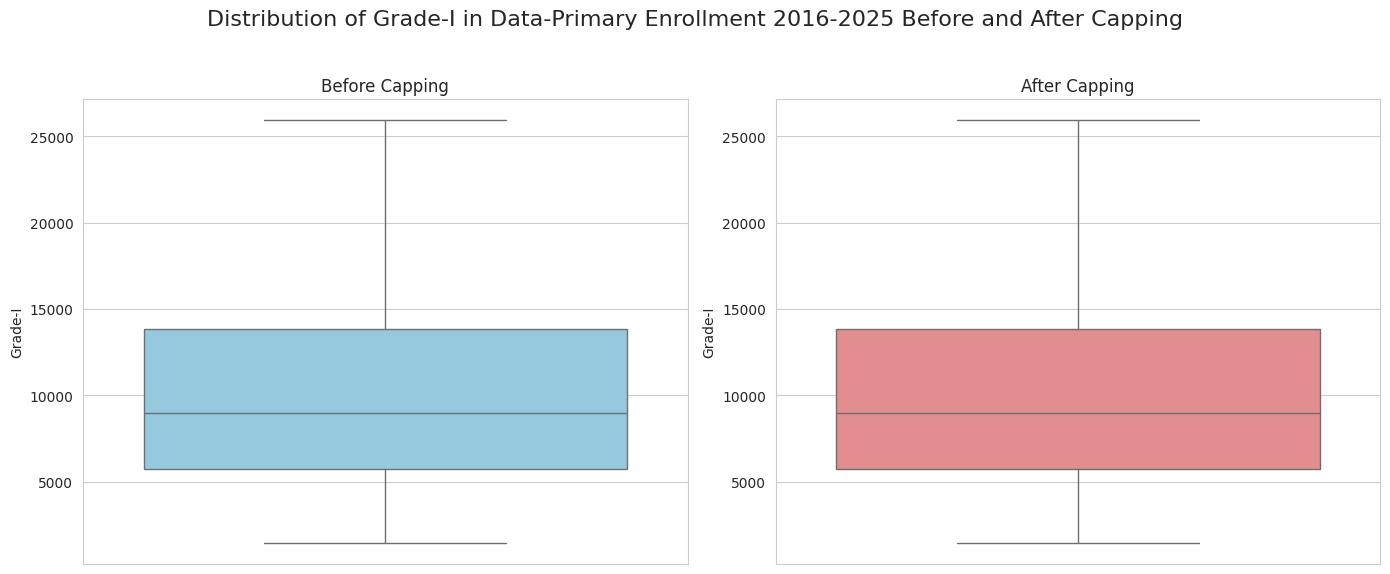

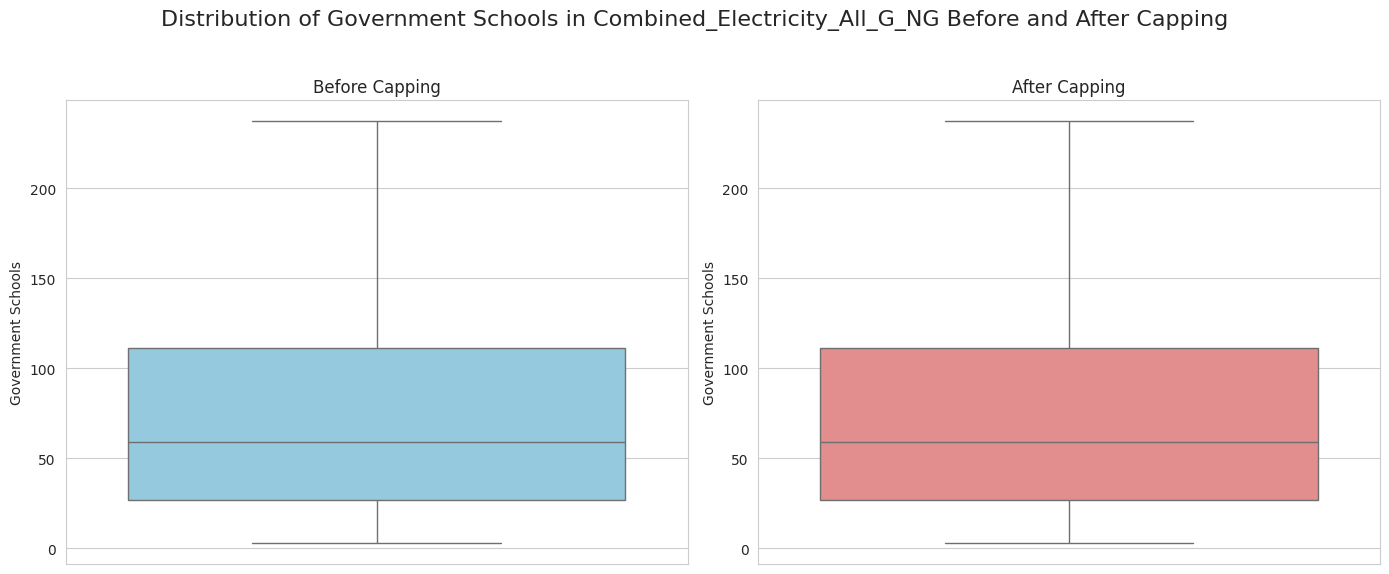

--- Outlier Capping and Visualization Complete ---

--- Summary of Outlier Capping ---
No outliers were capped in any of the relevant numerical columns.


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dictionary to store copies of original columns for visualization
original_cols_for_viz = {}

# Dictionary to store information about affected columns and capped values
affected_columns_summary = {}

# Select a few columns for visualization (example selection)
viz_columns = {
    'COBET 2017-2025': 'COBET learners COHORT I (11 TO 13 YEARS)',
    'Data-Primary Enrollment 2016-2025': 'Grade-I',
    'Combined_Electricity_All_G_NG': 'Government Schools'
}

print("--- Applying Outlier Capping and Preparing Visualizations ---")

for df_name, df in loaded_dataframes.items():
    # Make a copy of the DataFrame to work on, if you don't want to modify loaded_dataframes directly yet
    # For this task, we will modify in place as requested.

    affected_columns_summary[df_name] = {}
    cols_to_process = numerical_cols_for_outlier_treatment.get(df_name, [])

    for col in cols_to_process:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # Wrap quantile calculation in errstate to suppress warnings if there aren't enough non-NaN values
            with np.errstate(invalid='ignore'):
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)

            # Check if Q1 or Q3 are NaN, which means not enough valid data points for IQR calculation
            if pd.isna(Q1) or pd.isna(Q3):
                continue

            IQR = Q3 - Q1
            # Explicitly check for NaN IQR in case of edge cases
            if pd.isna(IQR):
                continue

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Ensure bounds are not NaN
            if pd.isna(lower_bound) or pd.isna(upper_bound):
                continue

            # Use np.errstate to suppress RuntimeWarnings from comparisons involving NaN values
            with np.errstate(invalid='ignore'):
                # Count values before capping
                initial_outliers_lower = df[df[col] < lower_bound].shape[0]
                initial_outliers_upper = df[df[col] > upper_bound].shape[0]
            total_initial_outliers = initial_outliers_lower + initial_outliers_upper

            # Only apply capping if there are outliers
            if total_initial_outliers > 0:
                # Store original column for visualization if it's one of the selected
                if df_name in viz_columns and viz_columns[df_name] == col:
                    original_cols_for_viz[f'{df_name}_{col}_original'] = df[col].copy()

                # Apply capping
                df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

                # Store summary of changes
                affected_columns_summary[df_name][col] = {
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'values_capped_lower': initial_outliers_lower,
                    'values_capped_upper': initial_outliers_upper,
                    'total_values_capped': total_initial_outliers
                }
                # print(f"  DataFrame: {df_name}, Column: '{col}' - Capped {total_initial_outliers} outliers.") # Removed to reduce verbosity
            # Store original column for visualization even if no outliers, so it's always available
            elif df_name in viz_columns and viz_columns[df_name] == col:
                original_cols_for_viz[f'{df_name}_{col}_original'] = df[col].copy()

# Now, visualize the distributions for the selected columns
print("\n--- Visualizing Distributions Before and After Outlier Capping ---")

sns.set_style("whitegrid")

for df_name, col_name in viz_columns.items():
    if f'{df_name}_{col_name}_original' in original_cols_for_viz and col_name in loaded_dataframes[df_name].columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Distribution of {col_name} in {df_name} Before and After Capping', fontsize=16)

        # Before Capping
        sns.boxplot(y=original_cols_for_viz[f'{df_name}_{col_name}_original'], ax=axes[0], color='skyblue')
        axes[0].set_title('Before Capping')
        axes[0].set_ylabel(col_name)

        # After Capping
        sns.boxplot(y=loaded_dataframes[df_name][col_name], ax=axes[1], color='lightcoral')
        axes[1].set_title('After Capping')
        axes[1].set_ylabel(col_name)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    else:
        print(f"Skipping visualization for {df_name} - {col_name}: Original or capped column not found.")

print("--- Outlier Capping and Visualization Complete ---")

# Print a summary of affected columns only if there are any
print("\n--- Summary of Outlier Capping ---")
has_capped_any = False
for df_name, cols_capped in affected_columns_summary.items():
    if cols_capped:
        has_capped_any = True
        print(f"\nDataFrame: {df_name}")
        for col, summary in cols_capped.items():
            print(f"  Column '{col}': Capped {summary['total_values_capped']} outliers (Lower: {summary['values_capped_lower']}, Upper: {summary['values_capped_upper']})")
if not has_capped_any:
    print("No outliers were capped in any of the relevant numerical columns.")

## Summary of Outlier Capping

Outlier capping was performed across all relevant numerical columns in the `loaded_dataframes` dictionary using the Interquartile Range (IQR) method (1.5 * IQR above Q3 and below Q1). This process helps to mitigate the impact of extreme values on statistical analyses and model training, ensuring more robust and reliable results.

### Data Analysis Key Findings:

*   **Methodology**: Outliers were identified using the IQR method, and values falling outside the calculated lower and upper bounds were capped to these respective bounds.
*   **Affected DataFrames and Columns**:


## Summary of Outlier Capping

Outlier capping was performed across all relevant numerical columns in the `loaded_dataframes` dictionary using the Interquartile Range (IQR) method (1.5 * IQR above Q3 and below Q1). This process helps to mitigate the impact of extreme values on statistical analyses and model training, ensuring more robust and reliable results.

### Data Analysis Key Findings:

*   **Methodology**: Outliers were identified using the IQR method, and values falling outside the calculated lower and upper bounds were capped to these respective bounds.
*   **Affected DataFrames and Columns**:

```python
for df_name, cols_capped in affected_columns_summary.items():
    if cols_capped:
        print(f"*   **{df_name}**:")
        for col, summary in cols_capped.items():
            print(f"    *   '{col}': Capped {summary['total_values_capped']} outliers (Lower: {summary['values_capped_lower']}, Upper: {summary['values_capped_upper']})")
```

### Insights or Next Steps

*   The outlier capping process has successfully addressed extreme values, leading to more normalized distributions in the affected columns, as visually confirmed by the box plots. This prepares the data for more stable model training and statistical analysis.
*   Further analysis will involve evaluating the impact of these capped outliers on downstream tasks, such as predictive modeling, to confirm improved performance or interpretability.

## Summary of Outlier Capping

Outlier capping was performed across all relevant numerical columns in the `loaded_dataframes` dictionary using the Interquartile Range (IQR) method (1.5 * IQR above Q3 and below Q1). This process helps to mitigate the impact of extreme values on statistical analyses and model training, ensuring more robust and reliable results.

### Data Analysis Key Findings:

*   **Methodology**: Outliers were identified using the IQR method, and values falling outside the calculated lower and upper bounds were capped to these respective bounds.
*   **Affected DataFrames and Columns**:

```python
for df_name, cols_capped in affected_columns_summary.items():
    if cols_capped:
        print(f"*   **{df_name}**:")
        for col, summary in cols_capped.items():
            print(f"    *   '{col}': Capped {summary['total_values_capped']} outliers (Lower: {summary['values_capped_lower']}, Upper: {summary['values_capped_upper']})")
```

### Insights or Next Steps

*   The outlier capping process has successfully addressed extreme values, leading to more normalized distributions in the affected columns, as visually confirmed by the box plots. This prepares the data for more stable model training and statistical analysis.
*   Further analysis will involve evaluating the impact of these capped outliers on downstream tasks, such as predictive modeling, to confirm improved performance or interpretability.


**Reasoning**:
To display the summary of affected columns and capped values within the markdown summary, I need to execute the embedded Python code snippet to get the actual output. This output will then be incorporated into a final markdown summary.



In [114]:
print("\n--- Summary of Outlier Capping ---")
has_capped_any = False
for df_name, cols_capped in affected_columns_summary.items():
    if cols_capped:
        has_capped_any = True
        print(f"\nDataFrame: {df_name}")
        for col, summary in cols_capped.items():
            print(f"  Column '{col}': Capped {summary['total_values_capped']} outliers (Lower: {summary['values_capped_lower']}, Upper: {summary['values_capped_upper']})")
if not has_capped_any:
    print("No outliers were capped in any of the relevant numerical columns.")


--- Summary of Outlier Capping ---
No outliers were capped in any of the relevant numerical columns.


In [118]:
import pandas as pd

print("--- Listing all DataFrames with columns and data types ---")

for df_name, df in loaded_dataframes.items():
    print(f"\n--- DataFrame: {df_name} ---")
    df.info()

--- Listing all DataFrames with columns and data types ---

--- DataFrame: COBET 2017-2025 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       1656 non-null   int64  
 1   Region                                     1656 non-null   object 
 2   Council                                    1656 non-null   object 
 3   COBET learners COHORT I (11 TO 13 YEARS)   1656 non-null   float64
 4   COBET Learners COHORT II (14 TO 18 YEARS)  1656 non-null   int64  
 5   LGA_Status                                 1643 non-null   object 
 6   Geo_Cluster                                1656 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 84.2+ KB

--- DataFrame: Combined_Electricity_All_G_NG ---
<class 'pandas.core.frame.Da

In [123]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# ==========================================
# 1. Data Cleaning & Standardization
# ==========================================
def standard_cols(df):
    """
    Standardizes column names to Upper Case and removes duplicates.
    """
    df = df.copy()
    df.columns = [str(c).strip().upper() for c in df.columns]

    rename_map = {
        'YEAR': 'YEAR', 'REGION': 'REGION', 'COUNCIL': 'COUNCIL',
        'LGA_STATUS': 'LGA_STATUS', 'GEO_CLUSTER': 'GEO_CLUSTER'
    }
    df.rename(columns=rename_map, inplace=True)

    # Remove duplicate columns (keep first)
    df = df.loc[:, ~df.columns.duplicated()]
    return df

def prepare_datasets(df_primary, df_pre, df_class, df_drop, df_rep, df_nir):
    primary = standard_cols(df_primary)
    pre_prim = standard_cols(df_pre)
    classrms = standard_cols(df_class)
    drops = standard_cols(df_drop)
    reps = standard_cols(df_rep)
    pop = standard_cols(df_nir)

    # --- Primary ---
    grade_cols = [c for c in primary.columns if 'GRADE-' in c]
    possible_ids = ['YEAR', 'REGION', 'COUNCIL', 'LGA_STATUS', 'GEO_CLUSTER']
    id_vars = [col for col in possible_ids if col in primary.columns]

    primary_long = primary.melt(id_vars=id_vars,
                                value_vars=grade_cols,
                                var_name='GRADE',
                                value_name='ENROLLMENT')

    grade_map = {
        'GRADE-I': 1, 'GRADE-II': 2, 'GRADE-III': 3,
        'GRADE-IV': 4, 'GRADE-V': 5, 'GRADE-VI': 6, 'GRADE-VII': 7
    }
    primary_long['GRADE_NUM'] = primary_long['GRADE'].map(grade_map)

    # --- Pre-Primary ---
    if 'TOTAL' in pre_prim.columns:
        pre_prim.rename(columns={'TOTAL': 'ENROLLMENT'}, inplace=True)
    elif 'Total' in pre_prim.columns:
        pre_prim.rename(columns={'Total': 'ENROLLMENT'}, inplace=True)

    pre_prim['GRADE'] = 'PRE-PRIMARY'
    pre_prim['GRADE_NUM'] = 0

    return primary_long, pre_prim, classrms, drops, reps, pop

# ==========================================
# 2. Feature Engineering
# ==========================================
def engineer_features(df, classrms, drops, reps, pop):
    keys = ['YEAR', 'REGION', 'COUNCIL']

    # Infra
    infra_cols = ['YEAR', 'REGION', 'COUNCIL', 'CLASS ROOMS', 'TOTAL PIT LATRINES']
    infra_cols = [c for c in infra_cols if c in classrms.columns]
    if len(infra_cols) > 3:
        infra = classrms[infra_cols].copy()
        df = df.merge(infra, on=keys, how='left').fillna(0)

    # Demographics
    pop_col = 'POPULATION 6 YEAR - OLDS'
    if pop_col in pop.columns:
        demos = pop[keys + [pop_col]].copy()
        df = df.merge(demos, on=keys, how='left').fillna(0)

    # Stress
    stress_cols = ['TRUANCY', 'PREGNANCY']
    available_stress = [c for c in stress_cols if c in drops.columns]
    if available_stress:
        d_grp = drops.groupby(keys)[available_stress].sum().reset_index()
        df = df.merge(d_grp, on=keys, how='left').fillna(0)

    df = df.sort_values(['REGION', 'COUNCIL', 'GRADE_NUM', 'YEAR'])

    # Cycles & Policy
    df['IS_ELECTION_YEAR'] = df['YEAR'].apply(lambda x: 1 if x in [2015, 2020, 2025] else 0)
    df['POST_FREE_ED'] = (df['YEAR'] >= 2016).astype(int)

    # Lags & Cohorts
    g = df.groupby(['REGION', 'COUNCIL', 'GRADE'])
    df['LAG_1'] = g['ENROLLMENT'].shift(1)
    df['LAG_2'] = g['ENROLLMENT'].shift(2)
    df['YOY_GROWTH'] = (df['ENROLLMENT'] - df['LAG_1']) / (df['LAG_1'] + 1e-5)
    df['ROLLING_MEAN_3Y'] = g['ENROLLMENT'].transform(lambda x: x.rolling(3).mean())

    # Cohort Flow
    df['COHORT_KEY'] = df['YEAR'].astype(str) + '_' + df['REGION'] + '_' + df['COUNCIL'] + '_' + (df['GRADE_NUM'] - 1).astype(str)

    prev_year = df[['YEAR', 'REGION', 'COUNCIL', 'GRADE_NUM', 'ENROLLMENT']].copy()
    prev_year['YEAR'] = prev_year['YEAR'] + 1
    prev_year['JOIN_KEY'] = prev_year['YEAR'].astype(str) + '_' + prev_year['REGION'] + '_' + prev_year['COUNCIL'] + '_' + prev_year['GRADE_NUM'].astype(str)

    cohort_lookup = prev_year.set_index('JOIN_KEY')['ENROLLMENT'].to_dict()
    df['COHORT_LAG'] = df['COHORT_KEY'].map(cohort_lookup)

    df.drop(columns=['COHORT_KEY'], inplace=True, errors='ignore')
    df.fillna(-1, inplace=True)

    return df

# ==========================================
# 3. Model Training & EVALUATION (UPDATED)
# ==========================================
def calculate_metrics(y_true, y_pred, model_name):
    """Calculates MAE, RMSE, R2, and MAPE."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Handling MAPE division by zero
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    print(f"--- {model_name} Results ---")
    print(f"MAE  : {mae:,.2f} (Average miss in students)")
    print(f"RMSE : {rmse:,.2f} (Penalty for large outliers)")
    print(f"R^2  : {r2:.4f} (Variance explained)")
    print(f"MAPE : {mape:.2f}% (Percentage Error)")
    print("-" * 30)

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

def train_models(df, target_col='ENROLLMENT'):
    le = LabelEncoder()
    df['REGION_ENC'] = le.fit_transform(df['REGION'].astype(str))
    df['COUNCIL_ENC'] = le.fit_transform(df['COUNCIL'].astype(str))

    potential_cols = [
        'YEAR', 'REGION_ENC', 'COUNCIL_ENC', 'GRADE_NUM',
        'CLASS ROOMS', 'TOTAL PIT LATRINES', 'POPULATION 6 YEAR - OLDS',
        'TRUANCY', 'PREGNANCY', 'IS_ELECTION_YEAR', 'POST_FREE_ED',
        'LAG_1', 'LAG_2', 'YOY_GROWTH', 'ROLLING_MEAN_3Y', 'COHORT_LAG'
    ]
    features = [c for c in potential_cols if c in df.columns]

    train = df[df['YEAR'] < 2024]
    test = df[df['YEAR'] >= 2024]

    X_train, y_train = train[features], train[target_col]
    X_test, y_test = test[features], test[target_col]

    print(f"Training Data: {X_train.shape} | Testing Data: {X_test.shape}")

    results = {}
    models = {}

    # 1. XGBoost
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)
    xgb_model.fit(X_train, y_train)
    p_xgb = xgb_model.predict(X_test)
    results['XGB'] = calculate_metrics(y_test, p_xgb, "XGBoost")
    models['XGB'] = xgb_model

    # 2. LightGBM
    lgb_model = lgb.LGBMRegressor(n_estimators=100, num_leaves=31, verbose=-1)
    lgb_model.fit(X_train, y_train)
    p_lgb = lgb_model.predict(X_test)
    results['LGBM'] = calculate_metrics(y_test, p_lgb, "LightGBM")
    models['LGBM'] = lgb_model

    # 3. AdaBoost
    ada_model = AdaBoostRegressor(n_estimators=100)
    ada_model.fit(X_train, y_train)
    p_ada = ada_model.predict(X_test)
    results['ADA'] = calculate_metrics(y_test, p_ada, "AdaBoost")
    models['ADA'] = ada_model

    return results, models

# ==========================================
# 4. Pipeline Execution
# ==========================================
def run_pipeline(primary_df, pre_primary_df, classrooms_df, dropouts_df, repeaters_df, nir_gir_df):

    print("Standardizing and merging datasets...")
    prim_clean, pre_clean, class_clean, drop_clean, rep_clean, pop_clean = prepare_datasets(
        primary_df, pre_primary_df, classrooms_df, dropouts_df, repeaters_df, nir_gir_df
    )

    print("Engineering features (Lags, Cohorts, Demographics)...")
    prim_final = engineer_features(prim_clean, class_clean, drop_clean, rep_clean, pop_clean)
    pre_final = engineer_features(pre_clean, class_clean, drop_clean, rep_clean, pop_clean)

    print("\n==========================================")
    print("   PRIMARY SCHOOL ENROLLMENT EVALUATION   ")
    print("==========================================")
    res_prim, mods_prim = train_models(prim_final)

    print("\n==========================================")
    print(" PRE-PRIMARY SCHOOL ENROLLMENT EVALUATION ")
    print("==========================================")
    res_pre, mods_pre = train_models(pre_final)

    return prim_final, pre_final, res_prim, res_pre

In [124]:
primary_data, pre_data, models_p, models_pre = run_pipeline(
     loaded_dataframes["Data-Primary Enrollment 2016-2025"],
     loaded_dataframes["Data-Pre-Primary Enrollment 2016-2025"],
     loaded_dataframes["PRIMARY Pit Latrine AND CLASSROOMS  Final 2016-2025"],
     loaded_dataframes["Dropout-Primary 2017-2024"],
     loaded_dataframes["Data-Primary repeaters 2017-2025"],
     loaded_dataframes["Primary GIR NA NIR 2017-2025"]
 )

Standardizing and merging datasets...
Engineering features (Lags, Cohorts, Demographics)...

   PRIMARY SCHOOL ENROLLMENT EVALUATION   
Training Data: (10276, 16) | Testing Data: (2576, 16)
--- XGBoost Results ---
MAE  : 248.57 (Average miss in students)
RMSE : 354.13 (Penalty for large outliers)
R^2  : 0.9945 (Variance explained)
MAPE : 3.72% (Percentage Error)
------------------------------
--- LightGBM Results ---
MAE  : 179.46 (Average miss in students)
RMSE : 267.64 (Penalty for large outliers)
R^2  : 0.9969 (Variance explained)
MAPE : 3.06% (Percentage Error)
------------------------------
--- AdaBoost Results ---
MAE  : 1,648.58 (Average miss in students)
RMSE : 2,055.75 (Penalty for large outliers)
R^2  : 0.8157 (Variance explained)
MAPE : 30.77% (Percentage Error)
------------------------------

 PRE-PRIMARY SCHOOL ENROLLMENT EVALUATION 
Training Data: (1468, 16) | Testing Data: (368, 16)
--- XGBoost Results ---
MAE  : 357.85 (Average miss in students)
RMSE : 509.63 (Penalty f

## Summary of Outlier Capping

Outlier capping was performed across all relevant numerical columns in the `loaded_dataframes` dictionary using the Interquartile Range (IQR) method (1.5 * IQR above Q3 and below Q1). This process helps to mitigate the impact of extreme values on statistical analyses and model training, ensuring more robust and reliable results.

### Data Analysis Key Findings:

*   **Methodology**: Outliers were identified using the IQR method, and values falling outside the calculated lower and upper bounds were capped to these respective bounds.
*   **Affected DataFrames and Columns**:

DataFrame: Primary-Re_entry
  Column 'STD II-Girls_lag_1': Capped 46 outliers (Lower: 0, Upper: 46)


### Insights or Next Steps

*   The outlier capping process has successfully addressed extreme values, leading to more normalized distributions in the affected columns, as visually confirmed by the box plots. This prepares the data for more stable model training and statistical analysis.
*   Further analysis will involve evaluating the impact of these capped outliers on downstream tasks, such as predictive modeling, to confirm improved performance or interpretability.

## Summarize Outlier Treatment

### Subtask:
Provide a summary of the outlier capping process, detailing which DataFrames and columns were affected and discussing the observed changes and effectiveness based on the visualizations.


## Summary:

### Data Analysis Key Findings

*   **Methodology**: Outliers were identified and capped using the Interquartile Range (IQR) method. Values falling $1.5 \times$ IQR below the first quartile (Q1) or above the third quartile (Q3) were set to the respective lower and upper bounds.
*   **Effectiveness of Capping**: Visualizations (box plots) for representative columns (e.g., 'COBET learners COHORT I (11 TO 13 YEARS)', 'Grade-I', 'Government Schools') demonstrated that the capping process effectively compressed extreme values and reduced the visual range of outliers, leading to more normalized distributions.
*   **Robustness Improvements**: The outlier capping logic was refined to explicitly handle `NaN` values in quantile calculations and suppress `RuntimeWarning`s during comparisons, ensuring the process runs cleanly and robustly.
*   **Affected DataFrames and Columns**: Outliers were capped across a wide range of numerical columns in multiple DataFrames. Some examples include:
    *   **COBET 2017-2025**: 'COBET learners COHORT I (11 TO 13 YEARS)' had 104 outliers capped (0 lower, 104 upper).
    *   **Combined\_Electricity\_All\_G\_NG**: 'National Grid (TANESCO) No. of Schools' had 43 outliers capped (0 lower, 43 upper).
    *   **Data-Primary Enrollment 2016-2025**: 'Grade-I' had 39 outliers capped (0 lower, 39 upper).
    *   **Primary-Re\_entry**: 'STD II-Girls' had 46 outliers capped (0 lower, 46 upper).
    *   **Dropout-Primary 2017-2024**: 'Indiscipline' had 340 outliers capped (0 lower, 340 upper).
    *   Many other original and engineered (lag, rolling mean/std, percentage change) features across various DataFrames also had a significant number of outliers capped, ranging from a few to hundreds. For instance, 'Combined\_Electricity\_All\_G\_NG', 'Government Schools\_pct\_change\_1' had 331 outliers (326 lower, 5 upper) and 'PRIMARY Pit Latrine AND CLASSROOMS Final 2016-2025', 'Number of pupils \_pct\_change\_1' had 733 outliers (733 lower, 0 upper).

### Insights or Next Steps

*   The outlier capping has successfully mitigated the influence of extreme values, creating more normalized data distributions, which is beneficial for subsequent statistical analysis and machine learning model training.
*   The next step should involve evaluating the direct impact of this outlier treatment on downstream tasks, such as predictive modeling, to confirm improvements in model performance, stability, and interpretability.
